In [19]:
#Import généraux

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tabulate
import math

In [68]:
def load_raw_data(name):
    # Définir le chemin du dossier actuel du notebook
    current_dir = os.getcwd()
    
    # Accéder au répertoire parent
    parent_dir = os.path.dirname(current_dir)
    raw_data_dir = parent_dir  + "/data_to_use/raw"

    # Afficher le chemin du répertoire parent
    print("Répertoire des données brutes: \n", raw_data_dir)
    
    #Chargement d'un dataframe
    df=pd.read_csv(raw_data_dir + name, index_col=0)
        
    return df

def visualisation_distrib_variable(df,nom_variable,figsize=(16,8)):   
    plt.figure(figsize=figsize)
    j=1
    plt.subplot(1, 3, j)
    sns.boxplot(df[nom_variable])
    plt.title('Défaut' + str(nom_variable))
    j+=1
    plt.subplot(1, 3, j)
    sns.violinplot(df[nom_variable])
    plt.title('Défaut' + str(nom_variable))
    j+=1
    plt.subplot(1, 3, j)
    sns.histplot(df[nom_variable],bins=100)
    plt.title('Défaut' + str(nom_variable))      
    plt.show()
    extract_outliers_from_boxplot(df[nom_variable],nom_variable)
    
def extract_outliers_from_boxplot(array,nom_variable):
    ## Get IQR
    iqr_q1 = np.quantile(array, 0.25)
    iqr_q3 = np.quantile(array, 0.75)
    med = np.median(array)

    # finding the iqr region
    iqr = iqr_q3-iqr_q1

    # finding upper and lower whiskers
    upper_bound = iqr_q3+(1.5*iqr)
    lower_bound = iqr_q1 -(1.5*iqr)

    outliers = array[(array <= lower_bound) | (array >= upper_bound)]
    print("Il y a ", len(outliers), " outliers dans la variable", nom_variable, "sur ", len(array), "échantillons." )
    if len(outliers) > 0:
        if len(outliers) <50:
            print('Outliers within the box plot are : {}'.format(outliers))
        else:
            print("Il y a trop d'outliers pour les afficher")
            
    return outliers


In [21]:
# Charegement et affichage du DataFrame
df=load_raw_data(name = "/train.csv")
df.head()

Répertoire des données brutes: 
 /media/frederic/Echanges_Linux_Windows/GitHUb/defauts_acier/defauts_plaques_acier/data_to_use/raw


X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
id                                                                          
0         584        590     909972     909977            16            8   
1         808        816     728350     728372           433           20   
2          39        192    2212076    2212144         11388          705   
3         781        789    3353146    3353173           210           16   
4        1540       1560     618457     618502           521           72   

    Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
id                                                          
0             5               2274                    113   
1            54              44478                     70   
2           420            1311391                     29   
3            29               3202                    114   
4            67              48231                     82   

    Maximum_of_Luminosity  ...  Orientation_Index  Luminosity_Index  \
id                         ...                                        
0                     140  ...            -0.5000           -0.0104   
1                     111  ...             0.7419           -0.2997   
2                     141  ...            -0.0105           -0.0944   
3                     134  ...             0.6667           -0.0402   
4                     111  ...             0.9158           -0.2455   

    SigmoidOfAreas  Pastry  Z_Scratch  K_Scatch  Stains  Dirtiness  Bumps  \
id                                                                          
0           0.1417       0          0         0       1          0      0   
1           0.9491       0          0         0       0          0      0   
2           1.0000       0          0         1       0          0      0   
3           0.4025       0          0         1       0          0      0   
4           0.9998       0          0         0       0          0      0   

    Other_Faults  
id                
0              0  
1              1  
2              0  
3              0  
4              1  

[5 rows x 34 columns]

In [22]:
#Séparation des variables et des cibles
features = df.iloc[:,:-7]
print("Features : ", features.columns)
targets = df.iloc[:,-7:]
print("Targets : ", targets.columns)

Features :  Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas'],
      dtype='object')
Targets :  Index(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps',
       'Other_Faults'],
      dtype='object')


In [23]:
#Liste de listes représentant les données du tableau
features_table = [
    ["Nom_Colonne", "Description","Nature", "Type"],
    ['id', 'Identité échantillon', 'Index', 'Sans Objet'],
    ["X_Minimum", "Les coordonnées minimales en X de la région où le défaut a été détecté. Cela donne une idée de la position horizontale du défaut sur la plaque", 'Variable',"int64"],
    ['X_Maximum', "Les coordonnées maximales en X de la région où le défaut a été détecté. Cela donne une idée de la position horizontale du défaut sur la plaque", 'Variable',"int64"],
    ['Y_Minimum', "Y_Minimum : Les coordonnées minimales en Y de la région où le défaut a été détecté, indiquant la position verticale du défaut", 'Variable',"int64"],
    ['Y_Maximum', "Y_Maximum : Les coordonnées minimales en Y de la région où le défaut a été détecté, indiquant la position verticale du défaut", 'Variable',"int64"],
    ["Pixels_Areas", "La taille de la région du défaut en termes de nombre de pixels, ce qui donne une indication de la taille du défaut", 'Variable',"int64"],
    ['X_Perimeter', "Le périmètre de la région du défaut mesuré horizontalement. Cela pourrait aider à comprendre la forme du défaut",'Variable',"int64"],
    ["Y_Perimeter", "Le périmètre de la région du défaut mesuré verticalement. Cela pourrait aider à comprendre la forme du défaut", 'Variable',"int64"],
    ['Sum_of_Luminosity', "La somme de la luminosité des pixels dans la région du défaut, ce qui peut donner des indices sur l'intensité du défaut", 'Variable',"int64"],
    ['Maximum_of_Luminosity', "La luminosité maximale parmi tous les pixels du défaut, fournissant une plage de l'intensité lumineuse du défaut",'Variable', "int64"],
    ['Minimum_of_Luminosity', "La luminosité minimale parmi tous les pixels du défaut, fournissant une plage de l'intensité lumineuse du défaut",'Variable', "int64"],
    ['Length_of_Conveyer', "La longueur du convoyeur sur lequel la plaque d'acier est inspectée. Cela peut avoir une influence sur la détection des défauts", 'Variable',"int64"],
    ['TypeOfSteel_A300', "Indicateurs binaires (0 ou 1) pour le type d'acier de la plaque, ce qui pourrait affecter la propension à certains types de défauts.",'Variable', "int64"],
    ['TypeOfSteel_A400', "Indicateurs binaires (0 ou 1) pour le type d'acier de la plaque, ce qui pourrait affecter la propension à certains types de défauts.",'Variable', "int64"],    
    ['Steel_Plate_Thickness', "L'épaisseur de la plaque d'acier, un facteur qui pourrait influencer la visibilité des défauts.",'Variable', "int64"],
    ['Edges_Index', "Un indice lié aux bords du défaut, pouvant indiquer la netteté ou la rugosité des bords du défaut",'Variable', "float64"],
    ['Empty_Index', "Un indice qui pourrait indiquer des zones vides ou moins denses en termes de pixels dans la région du défaut",'Variable', "float64"],
    ['Square_Index', "Indices calculés qui peuvent donner des informations sur la forme et l'orientation du défaut", 'Variable',"float64"],
    ['Outside_X_Index', "Indices calculés qui peuvent donner des informations sur la forme et l'orientation du défaut",'Variable', "float64"],
    ['Edges_X_Index', "Indices liés aux bords du défaut en X fournissant des détails sur la forme des bords dans ces directions",'Variable', "float64"],
    ['Edges_Y_Index', "Indices liés aux bords du défaut en X fournissant des détails sur la forme des bords dans ces directions",'Variable', "float64"],
    ['Outside_Global_Index',"Un indice indiquant si le défaut s'étend au-delà de la plaque d'acier.",'Variable', "float64"],
    ['LogOfAreas', "Le logarithme des aires du défaut, utile pour normaliser la distribution des tailles de défauts",'Variable', "float64"],
    ['Log_X_Index', "Le logarithme des dimensions du défaut, utile pour normaliser la distribution des tailles de défauts", 'Variable',"float64"],
    ['Log_Y_Index', "Le logarithme des dimensions du défaut, utile pour normaliser la distribution des tailles de défauts", 'Variable',"float64"],
    ['Orientation_Index', "Indices donnant des informations sur l'orientation du défaut",'Variable', "float64"],
    ['Luminosity_Index', "Indices donnant des informations sur la luminosité relative dans la région du défaut", 'Variable',"float64"],
    ['SigmoidOfAreas', "Le sigmoid des aires, qui peut aider à comprendre la distribution des tailles de défauts d'une manière qui favorise les valeurs moyennes", 'Variable',"float64"],
    ]
      
targets_table = [
    ['Pastry', "A ajouter", 'Target',"int64"],
    ['Z_Scratch', "A ajouter", 'Target',"int64"],
    ['K_Scatch', "A ajouter",'Target', "int64"],
    ['Stains', "A ajouter", 'Target',"int64"],    
    ['Dirtiness', "A ajouter",'Target', "int64"],
    ['Bumps', "A ajouter", 'Target',"int64"],
    ['Other_Faults', "A ajouter", 'Target',"int64"]
    ]
    
# Utilisation de tabulate pour créer le tableau
tabulate_features = tabulate.tabulate(features_table, headers="firstrow", tablefmt="grid")

# Utilisation de tabulate pour créer le tableau
tabulate_targets = tabulate.tabulate(targets_table, headers="firstrow", tablefmt="grid")

In [24]:
# Affichage du tableau
print(tabulate_features) 

+-----------------------+------------------------------------------------------------------------------------------------------------------------------------------------+----------+------------+
| Nom_Colonne           | Description                                                                                                                                    | Nature   | Type       |
+=======================+================================================================================================================================================+==========+============+
| id                    | Identité échantillon                                                                                                                           | Index    | Sans Objet |
+-----------------------+------------------------------------------------------------------------------------------------------------------------------------------------+----------+------------+
| X_Minimum             |

In [25]:
# Affichage du tableau
print(tabulate_targets ) 

+--------------+-------------+----------+---------+
| Pastry       | A ajouter   | Target   | int64   |
+==============+=============+==========+=========+
| Z_Scratch    | A ajouter   | Target   | int64   |
+--------------+-------------+----------+---------+
| K_Scatch     | A ajouter   | Target   | int64   |
+--------------+-------------+----------+---------+
| Stains       | A ajouter   | Target   | int64   |
+--------------+-------------+----------+---------+
| Dirtiness    | A ajouter   | Target   | int64   |
+--------------+-------------+----------+---------+
| Bumps        | A ajouter   | Target   | int64   |
+--------------+-------------+----------+---------+
| Other_Faults | A ajouter   | Target   | int64   |
+--------------+-------------+----------+---------+


In [26]:
df.info()
#que des valeurs numériques, pas de catégories

<class 'pandas.core.frame.DataFrame'>
Index: 19219 entries, 0 to 19218
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              19219 non-null  int64  
 1   X_Maximum              19219 non-null  int64  
 2   Y_Minimum              19219 non-null  int64  
 3   Y_Maximum              19219 non-null  int64  
 4   Pixels_Areas           19219 non-null  int64  
 5   X_Perimeter            19219 non-null  int64  
 6   Y_Perimeter            19219 non-null  int64  
 7   Sum_of_Luminosity      19219 non-null  int64  
 8   Minimum_of_Luminosity  19219 non-null  int64  
 9   Maximum_of_Luminosity  19219 non-null  int64  
 10  Length_of_Conveyer     19219 non-null  int64  
 11  TypeOfSteel_A300       19219 non-null  int64  
 12  TypeOfSteel_A400       19219 non-null  int64  
 13  Steel_Plate_Thickness  19219 non-null  int64  
 14  Edges_Index            19219 non-null  float64
 15  Empty_I

In [27]:
df.describe()

X_Minimum     X_Maximum     Y_Minimum     Y_Maximum   Pixels_Areas  \
count  19219.000000  19219.000000  1.921900e+04  1.921900e+04   19219.000000   
mean     709.854675    753.857641  1.849756e+06  1.846605e+06    1683.987616   
std      531.544189    499.836603  1.903554e+06  1.896295e+06    3730.319865   
min        0.000000      4.000000  6.712000e+03  6.724000e+03       6.000000   
25%       49.000000    214.000000  6.574680e+05  6.575020e+05      89.000000   
50%      777.000000    796.000000  1.398169e+06  1.398179e+06     168.000000   
75%     1152.000000   1165.000000  2.368032e+06  2.362511e+06     653.000000   
max     1705.000000   1713.000000  1.298766e+07  1.298769e+07  152655.000000   

        X_Perimeter   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
count  19219.000000  19219.000000       1.921900e+04           19219.000000   
mean      95.654665     64.124096       1.918467e+05              84.808419   
std      177.821382    101.054178       4.420247e+05              28.800344   
min        2.000000      1.000000       2.500000e+02               0.000000   
25%       15.000000     14.000000       9.848000e+03              70.000000   
50%       25.000000     23.000000       1.823800e+04              90.000000   
75%       64.000000     61.000000       6.797800e+04             105.000000   
max     7553.000000    903.000000       1.159141e+07             196.000000   

       Maximum_of_Luminosity  ...  Orientation_Index  Luminosity_Index  \
count           19219.000000  ...       19219.000000      19219.000000   
mean              128.647380  ...           0.102742         -0.138382   
std                14.196976  ...           0.487681          0.120344   
min                39.000000  ...          -0.988400         -0.885000   
25%               124.000000  ...          -0.272700         -0.192500   
50%               127.000000  ...           0.111100         -0.142600   
75%               135.000000  ...           0.529400         -0.084000   
max               253.000000  ...           0.991700          0.642100   

       SigmoidOfAreas        Pastry     Z_Scratch      K_Scatch        Stains  \
count    19219.000000  19219.000000  19219.000000  19219.000000  19219.000000   
mean         0.571902      0.076279      0.059837      0.178573      0.029554   
std          0.332219      0.265450      0.237190      0.383005      0.169358   
min          0.119000      0.000000      0.000000      0.000000      0.000000   
25%          0.253200      0.000000      0.000000      0.000000      0.000000   
50%          0.472900      0.000000      0.000000      0.000000      0.000000   
75%          0.999400      0.000000      0.000000      0.000000      0.000000   
max          1.000000      1.000000      1.000000      1.000000      1.000000   

          Dirtiness         Bumps  Other_Faults  
count  19219.000000  19219.000000  19219.000000  
mean       0.025235      0.247828      0.341225  
std        0.156844      0.431762      0.474133  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000  
75%        0.000000      0.000000      1.000000  
max        1.000000      1.000000      1.000000  

[8 rows x 34 columns]

In [28]:
df.shape

(19219, 34)

In [29]:
df.isna().sum().sum()
#pas de valeurs manquantes

0

In [30]:
df.duplicated().sum()
#pas de doublons

0

In [31]:
for i in ["Pastry",	"Z_Scratch",	"K_Scatch",	"Stains",	"Dirtiness",	"Bumps",	"Other_Faults"]:

    p = round(df[i].sum()/df.shape[0],3)
    print(f"la proportion de defaut du type {i} est de {p}")

la proportion de defaut du type Pastry est de 0.076
la proportion de defaut du type Z_Scratch est de 0.06
la proportion de defaut du type K_Scatch est de 0.179
la proportion de defaut du type Stains est de 0.03
la proportion de defaut du type Dirtiness est de 0.025
la proportion de defaut du type Bumps est de 0.248
la proportion de defaut du type Other_Faults est de 0.341


In [32]:
df["several_defaut"]=df["Pastry"]+df["Z_Scratch"]+df["K_Scatch"]+df["Stains"]+df["Dirtiness"]+df["Bumps"]+df["Other_Faults"]
df["several_defaut"].value_counts(normalize=True)

#95% des entrées présentent 1 seul défaut
#4% sont sans défaut
#0,1% ont deux défauts
#pas de triple défaut ou plus...

several_defaut
1    0.956345
0    0.042562
2    0.001093
Name: proportion, dtype: float64

## Examen des outliers

In [34]:
features_outliers=['Y_Minimum', 'Y_Maximum','Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Steel_Plate_Thickness','Empty_Index', 'Square_Index',
       'Outside_X_Index','Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas','Log_X_Index',
       'Log_Y_Index', 'Luminosity_Index']
    

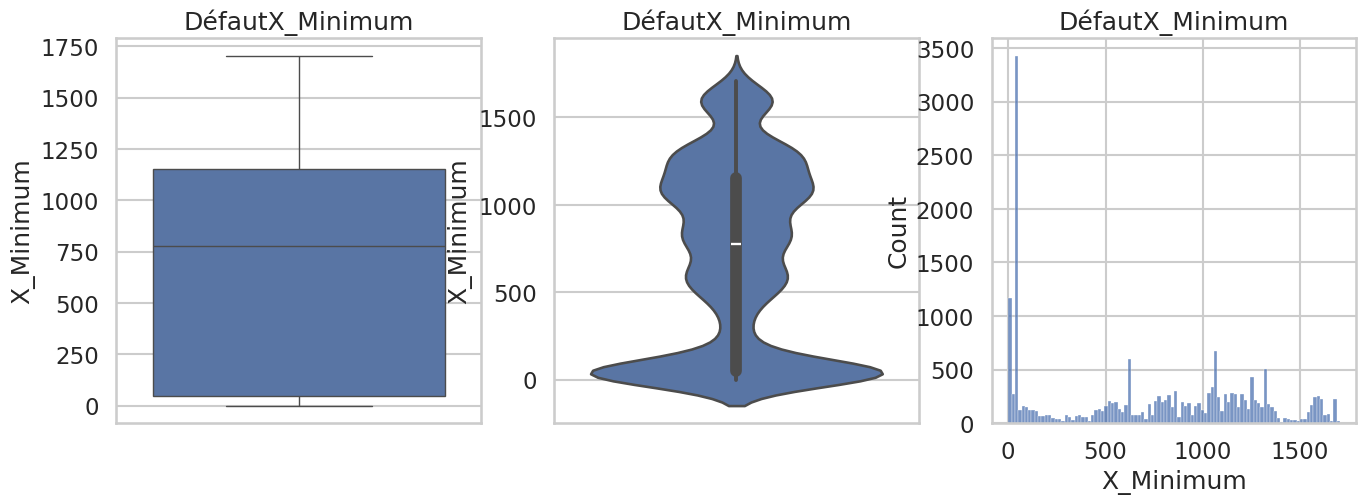

Il y a  0  outliers dans la variable X_Minimum sur  19219 échantillons.


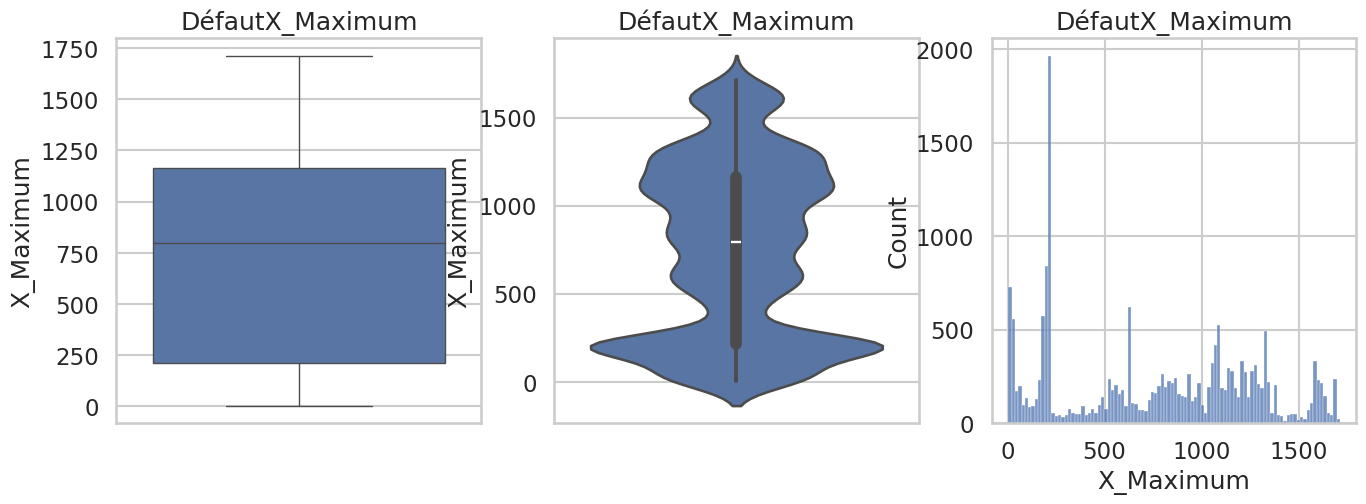

Il y a  0  outliers dans la variable X_Maximum sur  19219 échantillons.


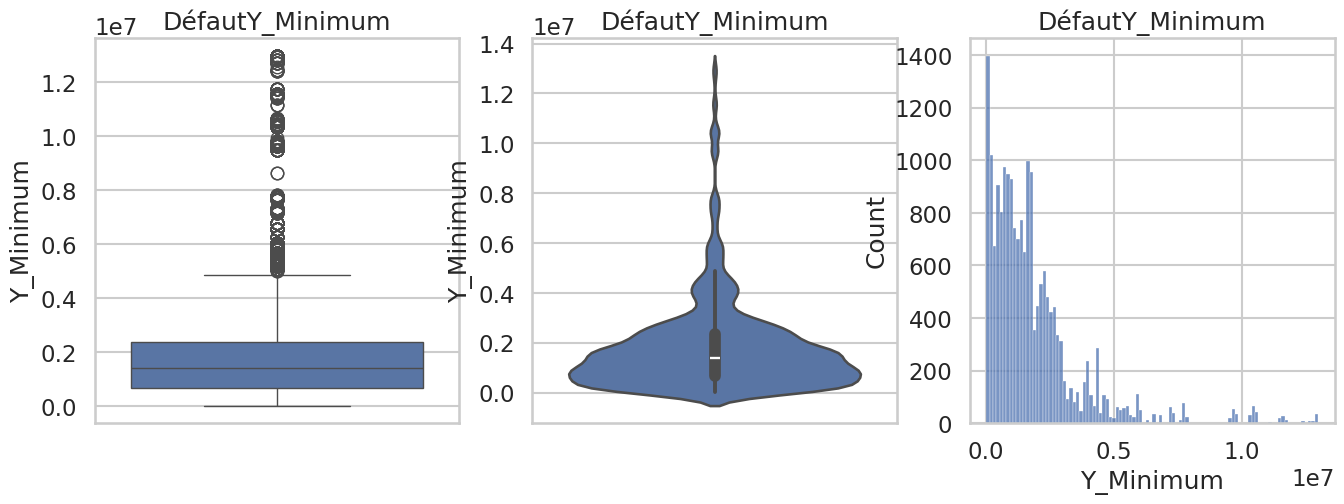

Il y a  1118  outliers dans la variable Y_Minimum sur  19219 échantillons.
Il y a trop d'outliers pour les afficher


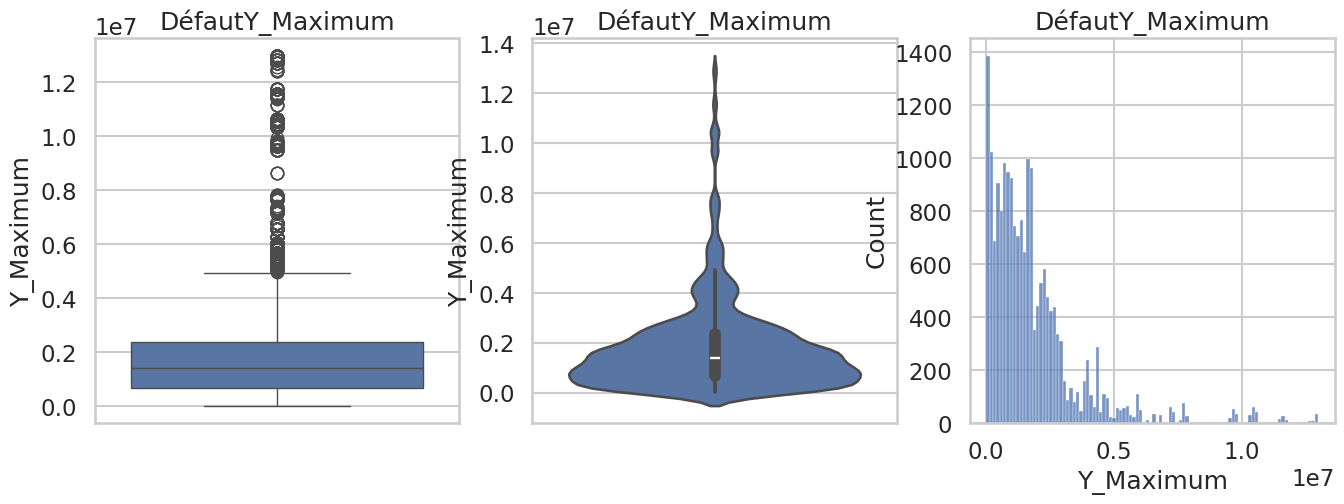

Il y a  1112  outliers dans la variable Y_Maximum sur  19219 échantillons.
Il y a trop d'outliers pour les afficher


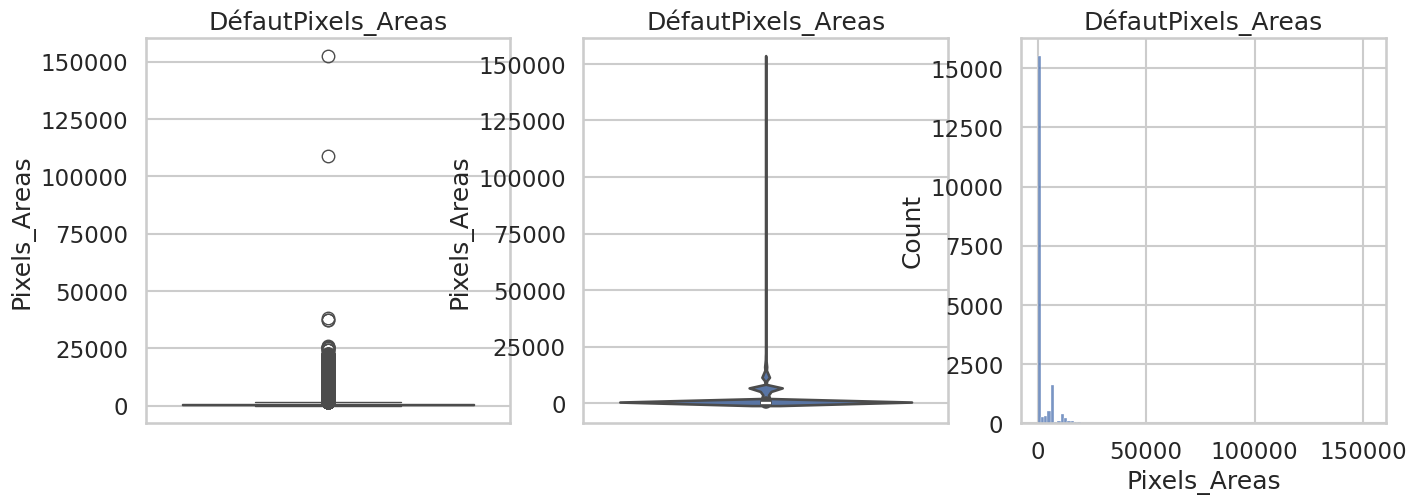

Il y a  3727  outliers dans la variable Pixels_Areas sur  19219 échantillons.
Il y a trop d'outliers pour les afficher


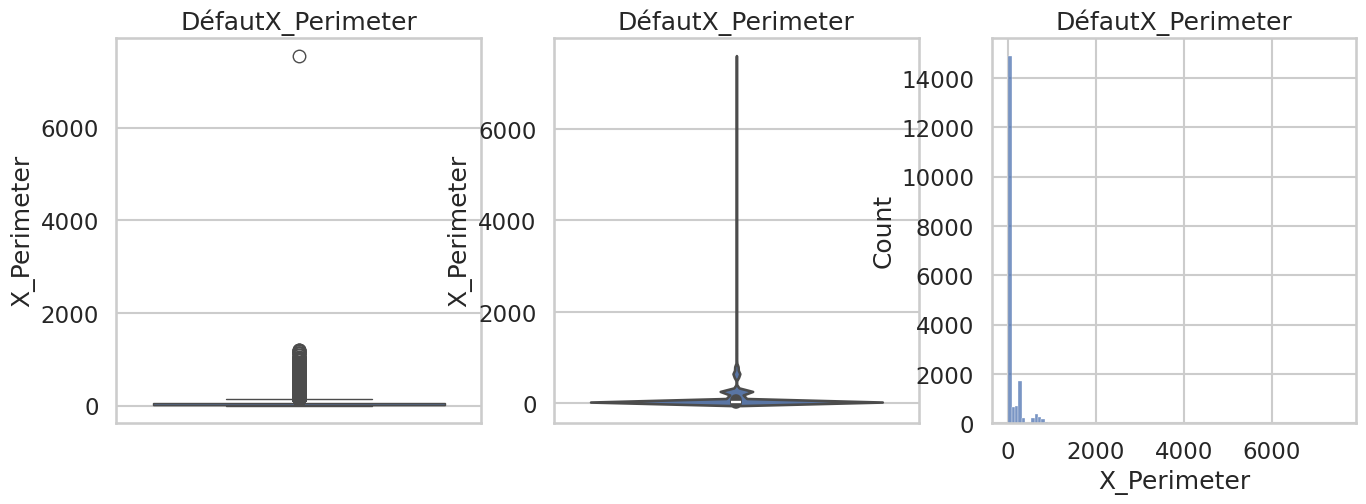

Il y a  3717  outliers dans la variable X_Perimeter sur  19219 échantillons.
Il y a trop d'outliers pour les afficher


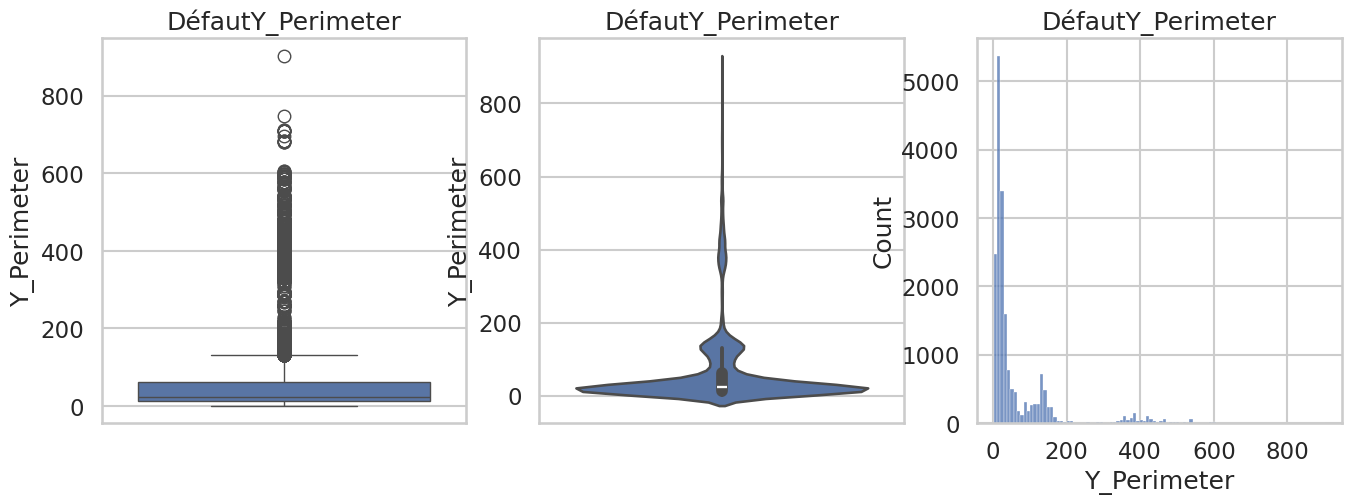

Il y a  2785  outliers dans la variable Y_Perimeter sur  19219 échantillons.
Il y a trop d'outliers pour les afficher


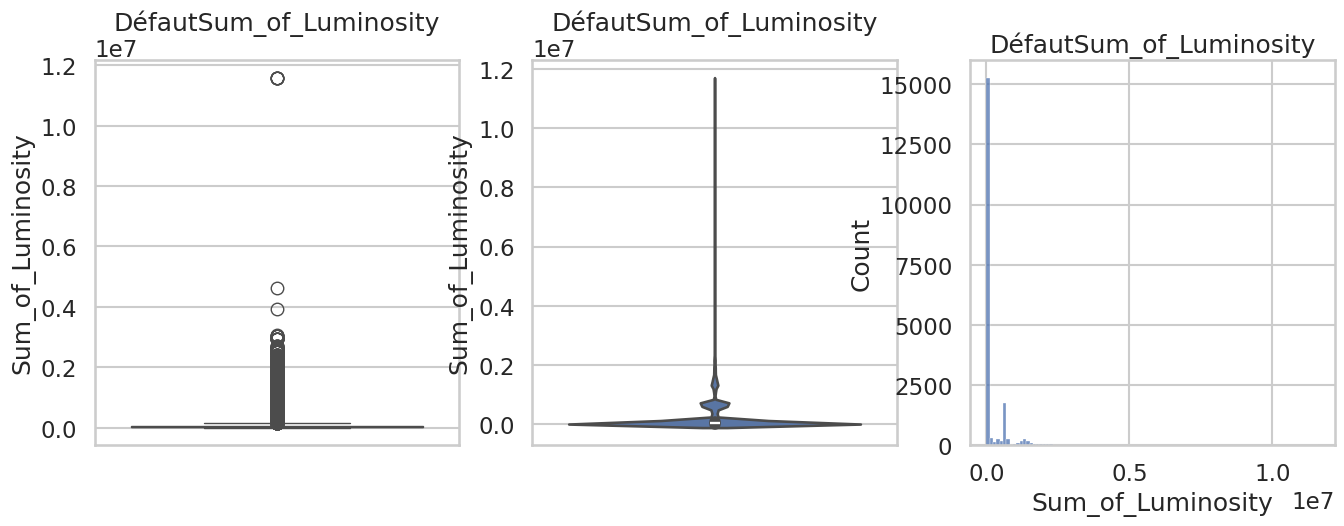

Il y a  3826  outliers dans la variable Sum_of_Luminosity sur  19219 échantillons.
Il y a trop d'outliers pour les afficher


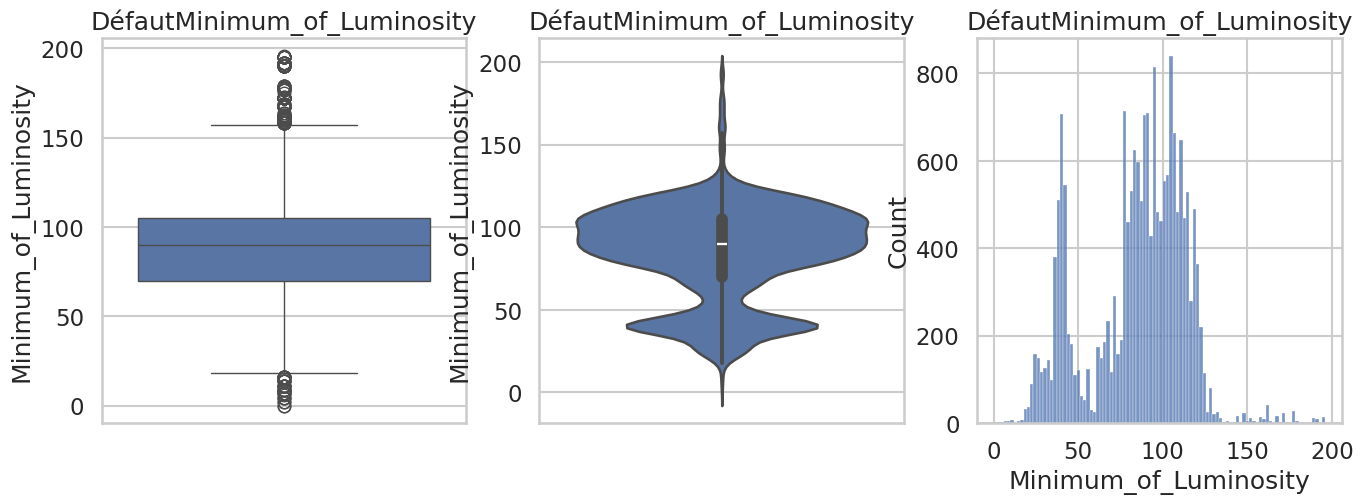

Il y a  211  outliers dans la variable Minimum_of_Luminosity sur  19219 échantillons.
Il y a trop d'outliers pour les afficher


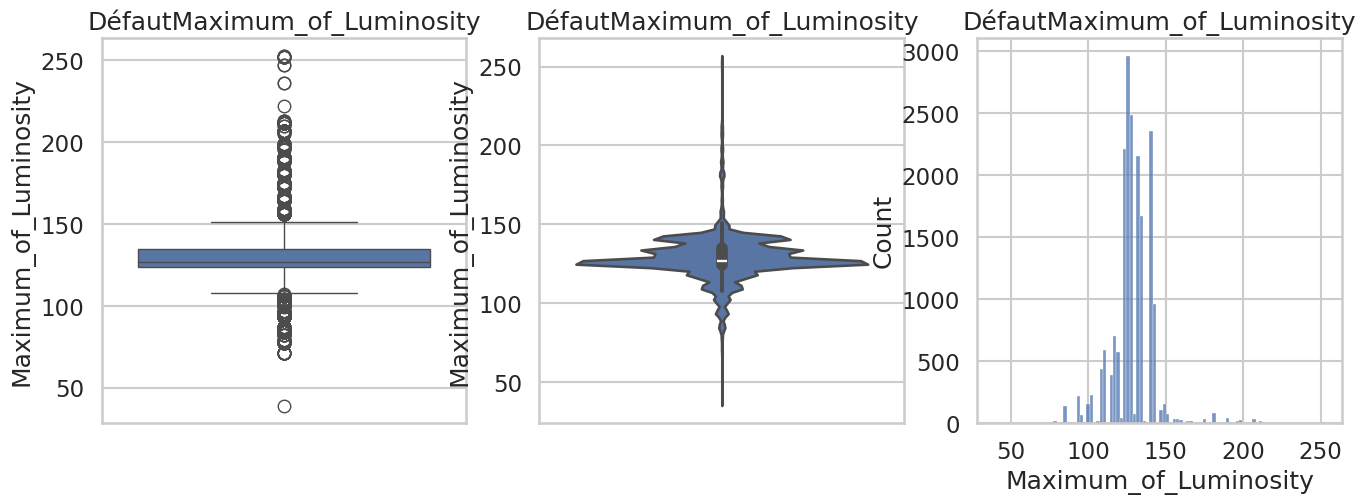

Il y a  1292  outliers dans la variable Maximum_of_Luminosity sur  19219 échantillons.
Il y a trop d'outliers pour les afficher


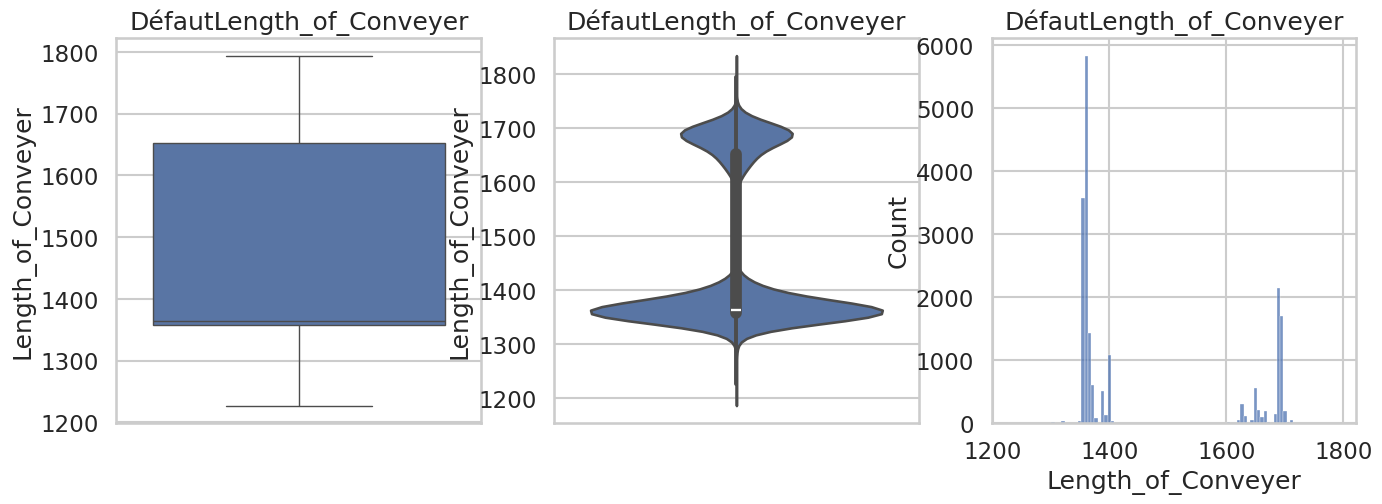

Il y a  0  outliers dans la variable Length_of_Conveyer sur  19219 échantillons.


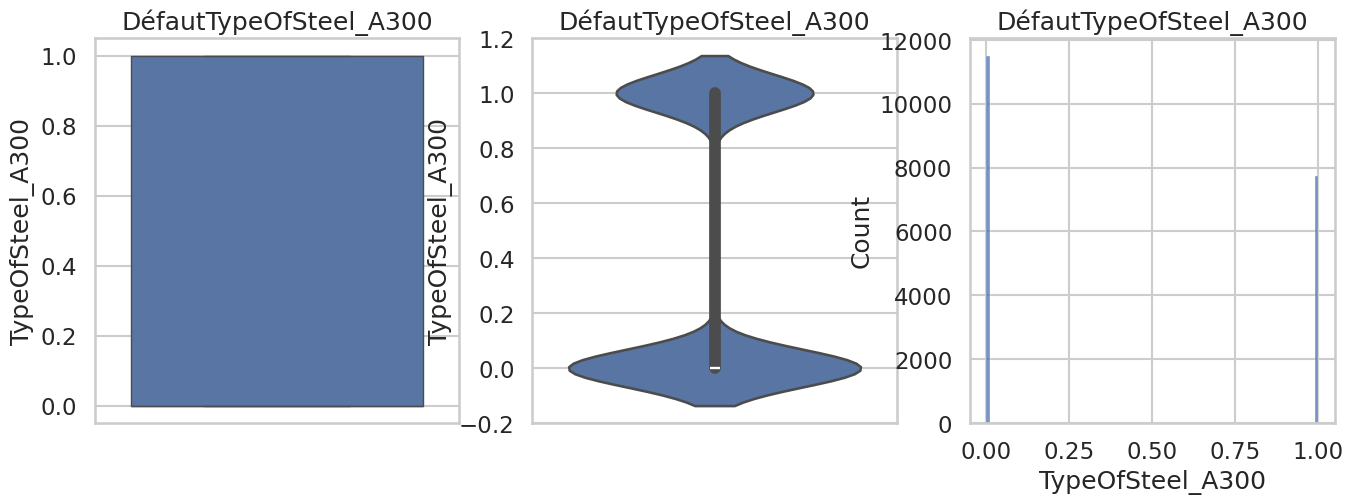

Il y a  0  outliers dans la variable TypeOfSteel_A300 sur  19219 échantillons.


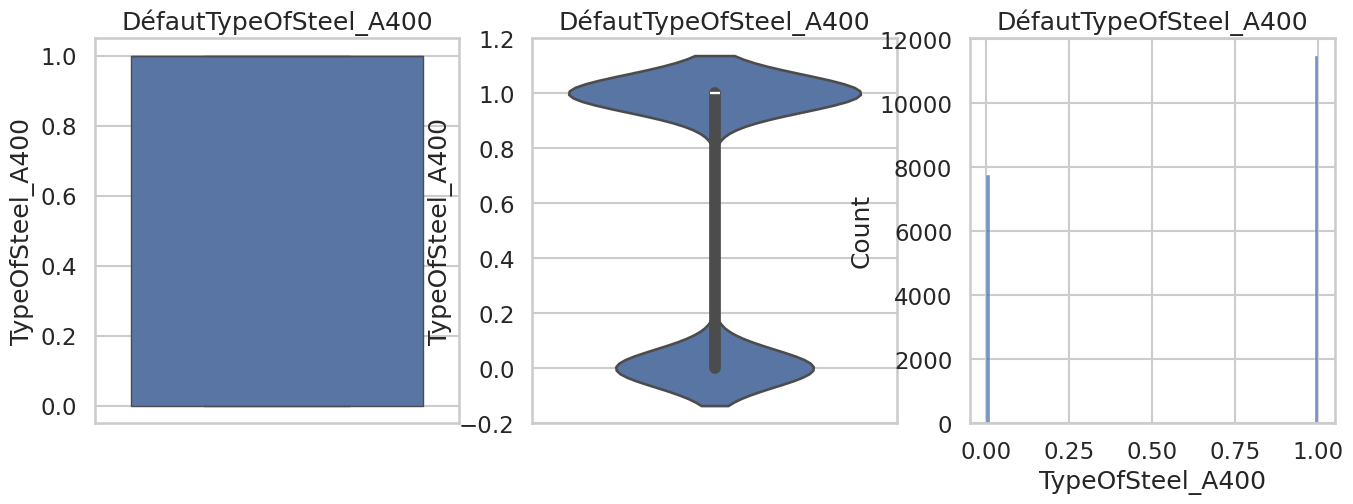

Il y a  0  outliers dans la variable TypeOfSteel_A400 sur  19219 échantillons.


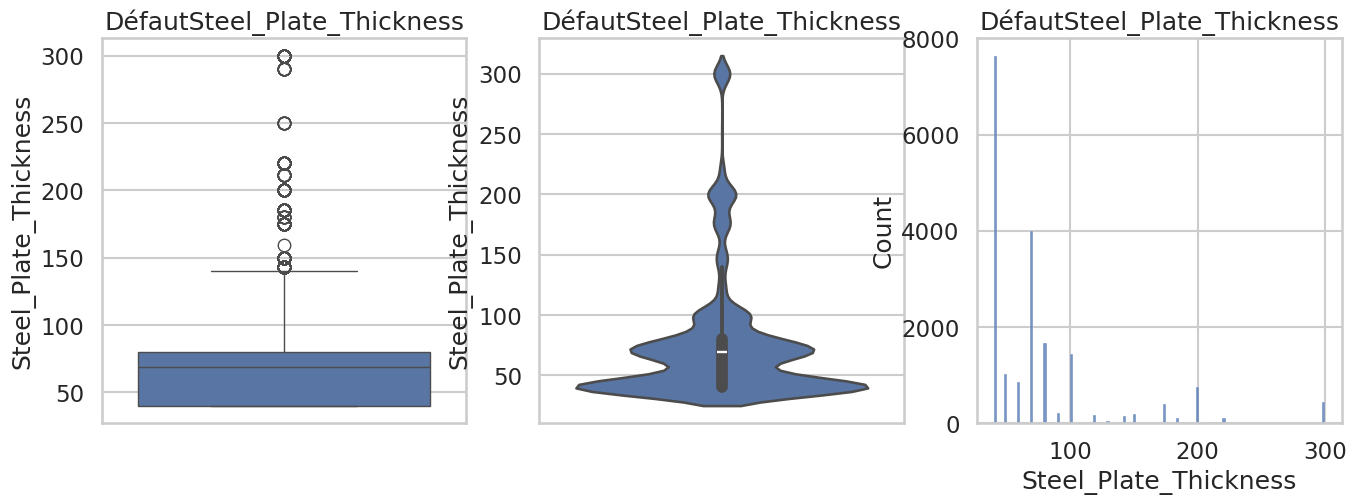

Il y a  2181  outliers dans la variable Steel_Plate_Thickness sur  19219 échantillons.
Il y a trop d'outliers pour les afficher


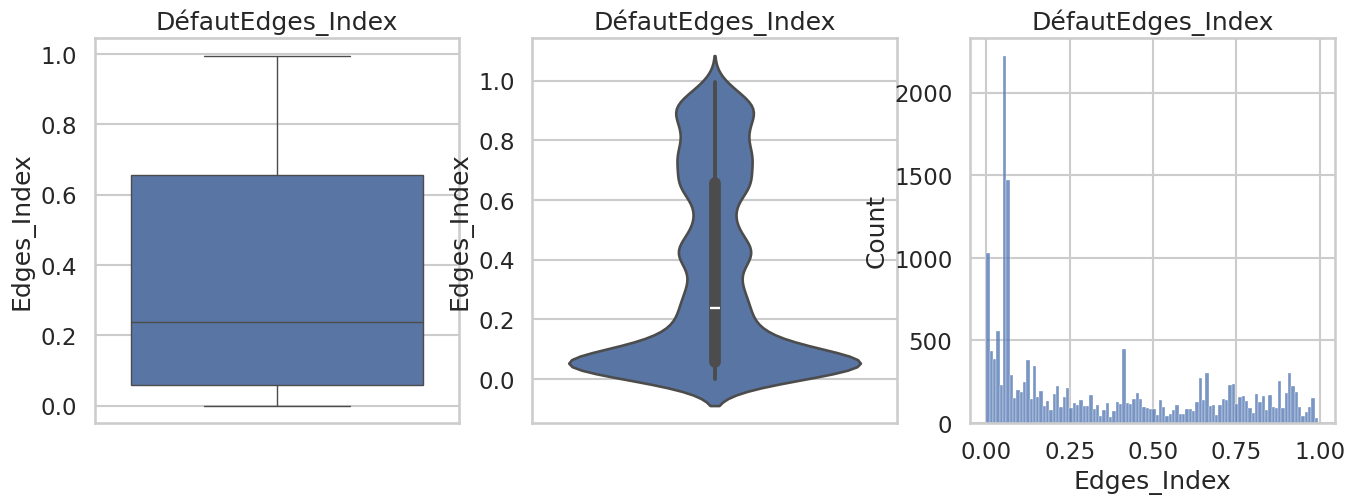

Il y a  0  outliers dans la variable Edges_Index sur  19219 échantillons.


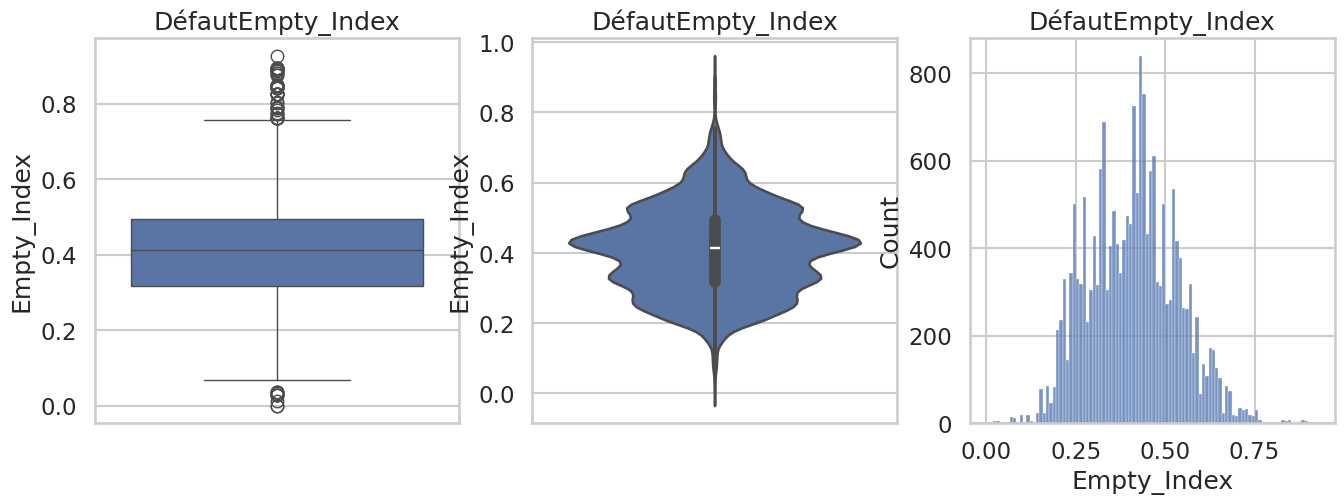

Il y a  61  outliers dans la variable Empty_Index sur  19219 échantillons.
Il y a trop d'outliers pour les afficher


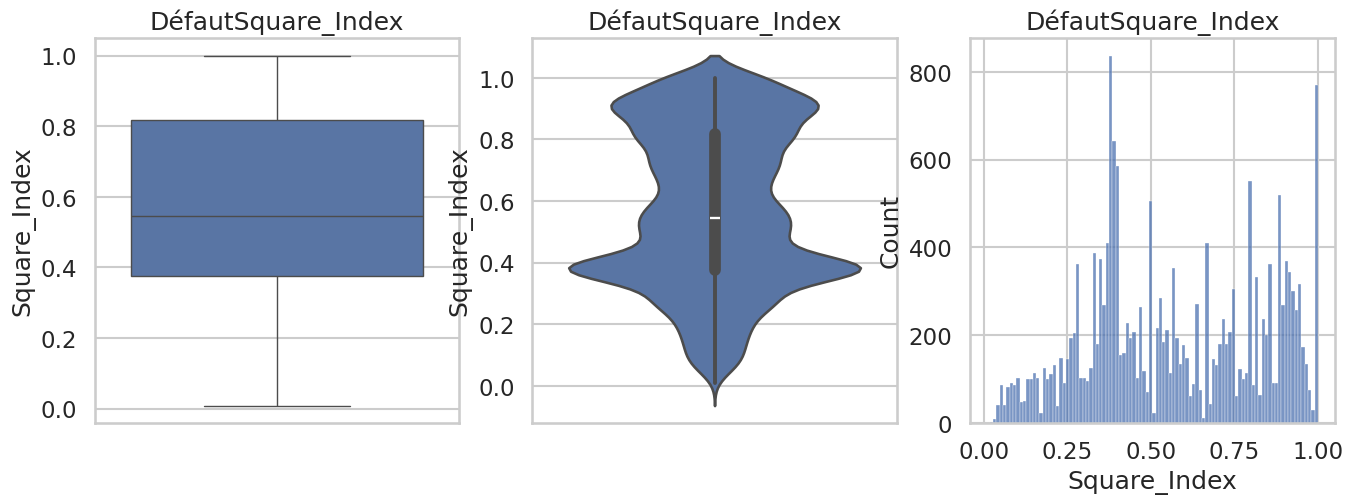

Il y a  0  outliers dans la variable Square_Index sur  19219 échantillons.


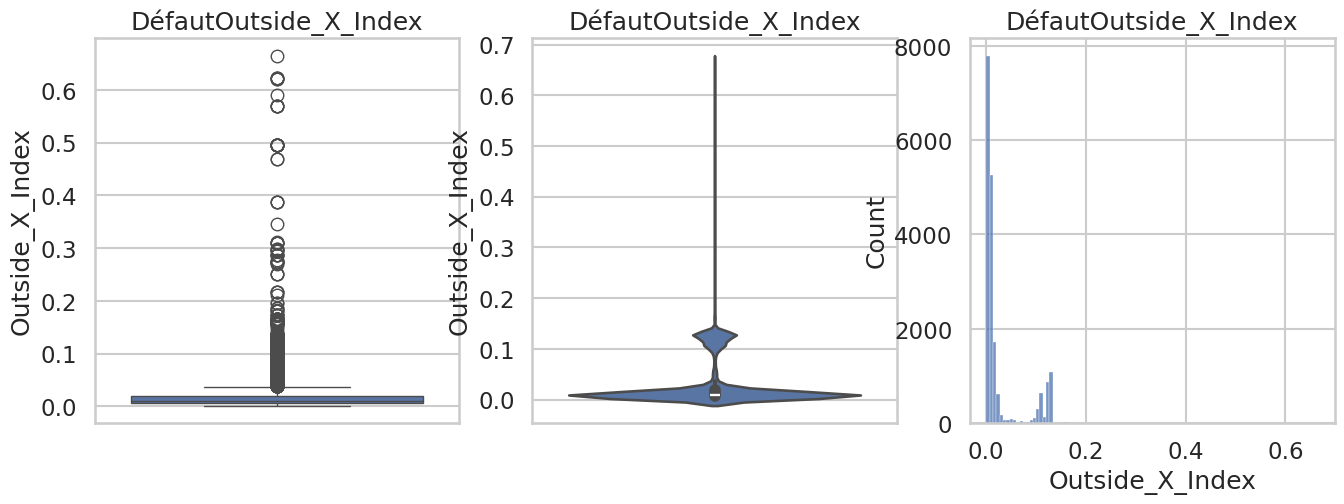

Il y a  3641  outliers dans la variable Outside_X_Index sur  19219 échantillons.
Il y a trop d'outliers pour les afficher


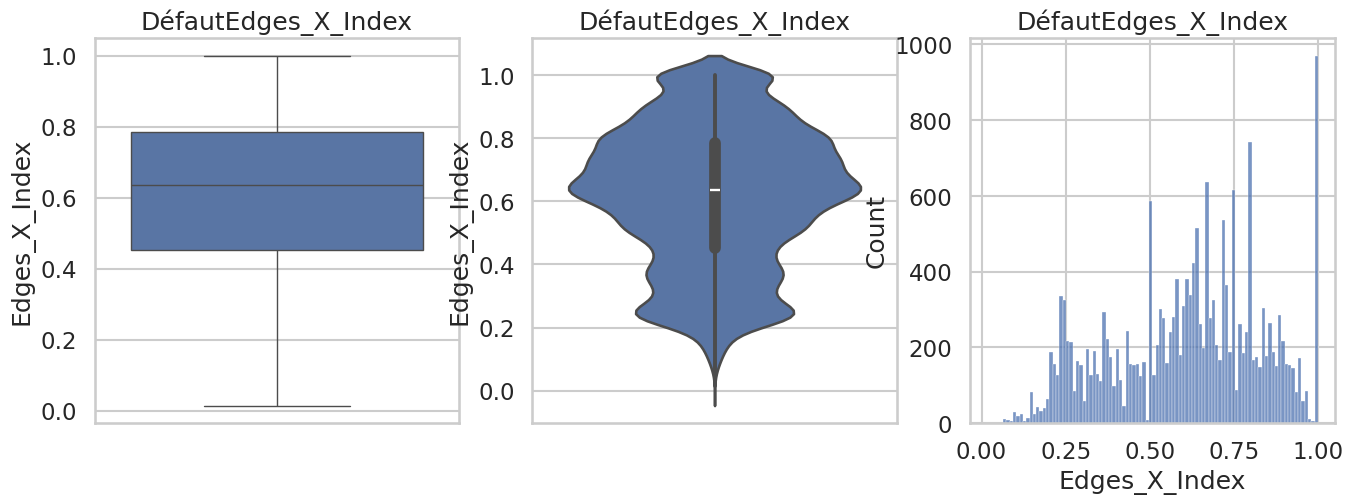

Il y a  0  outliers dans la variable Edges_X_Index sur  19219 échantillons.


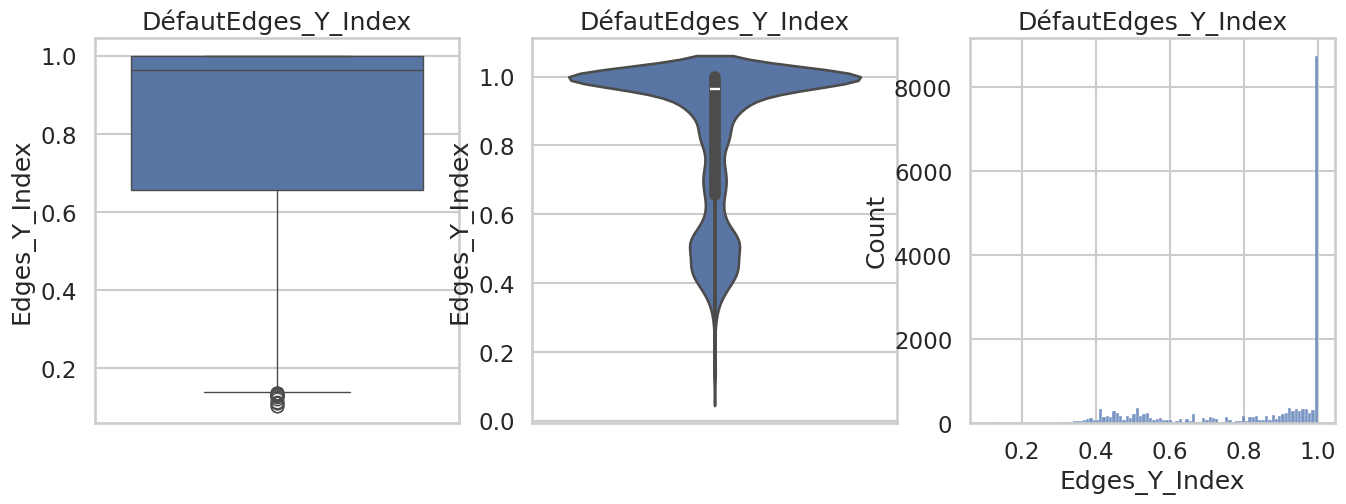

Il y a  25  outliers dans la variable Edges_Y_Index sur  19219 échantillons.
Outliers within the box plot are : id
635      0.1312
1643     0.1379
1785     0.1321
2351     0.1379
2754     0.1321
3142     0.1312
3250     0.1229
3554     0.1132
5786     0.1312
6978     0.1379
8174     0.1321
9998     0.1123
10451    0.1378
10600    0.1321
12200    0.1050
12492    0.1321
12529    0.1123
13390    0.1050
13829    0.1321
15228    0.1272
15372    0.1329
16278    0.1321
16881    0.1312
17936    0.1312
19049    0.1312
Name: Edges_Y_Index, dtype: float64


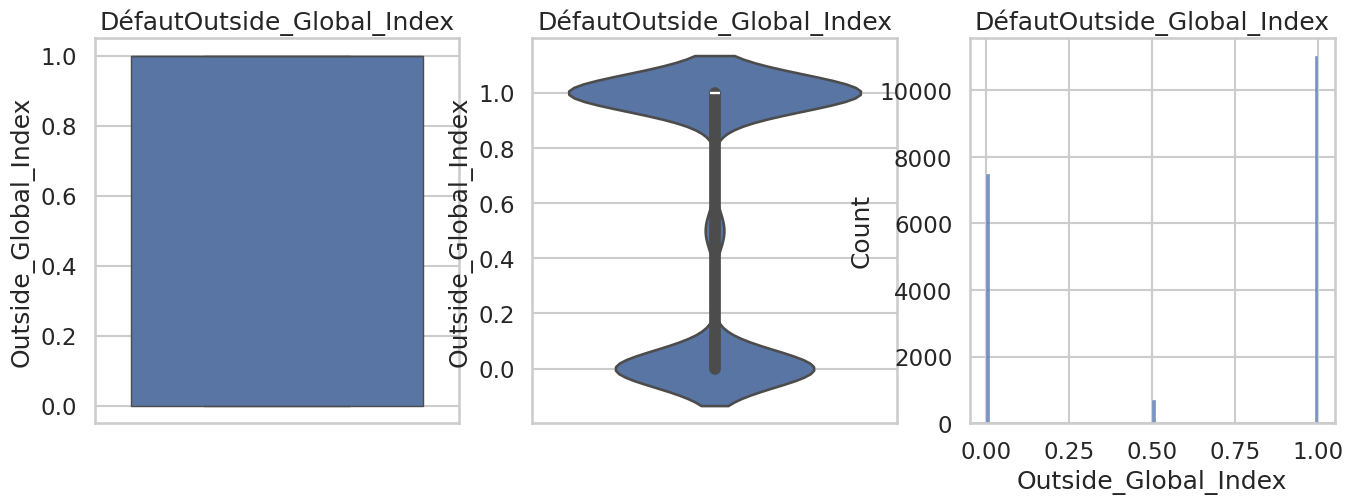

Il y a  0  outliers dans la variable Outside_Global_Index sur  19219 échantillons.


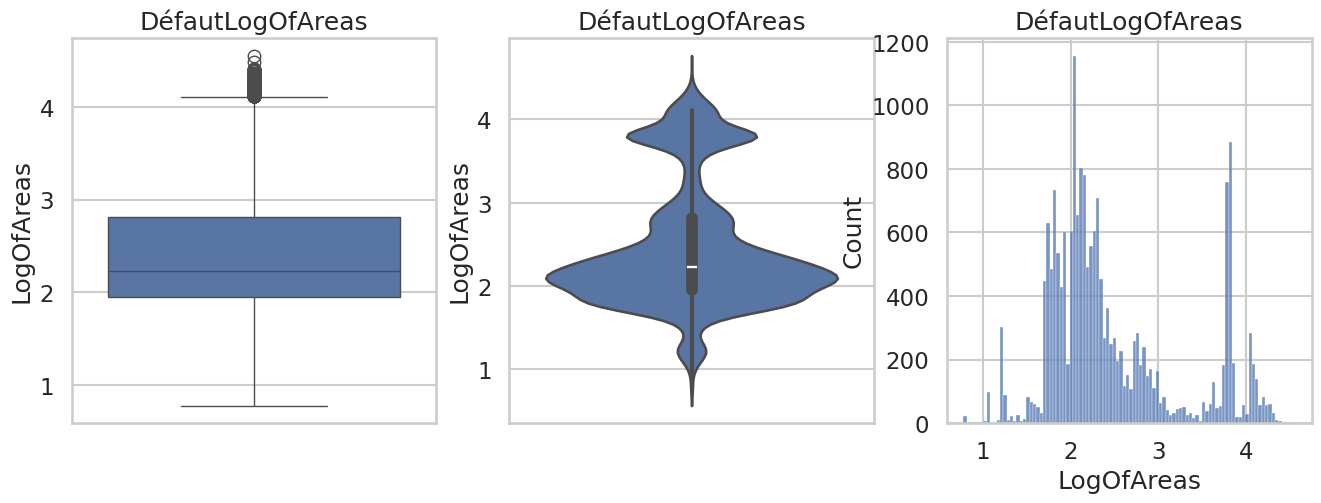

Il y a  421  outliers dans la variable LogOfAreas sur  19219 échantillons.
Il y a trop d'outliers pour les afficher


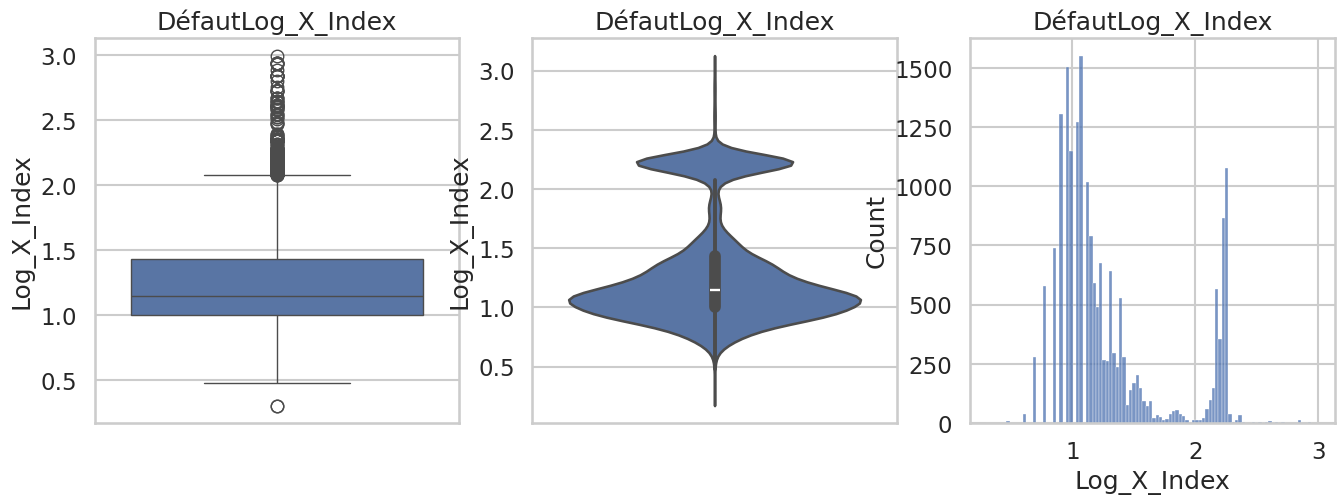

Il y a  3325  outliers dans la variable Log_X_Index sur  19219 échantillons.
Il y a trop d'outliers pour les afficher


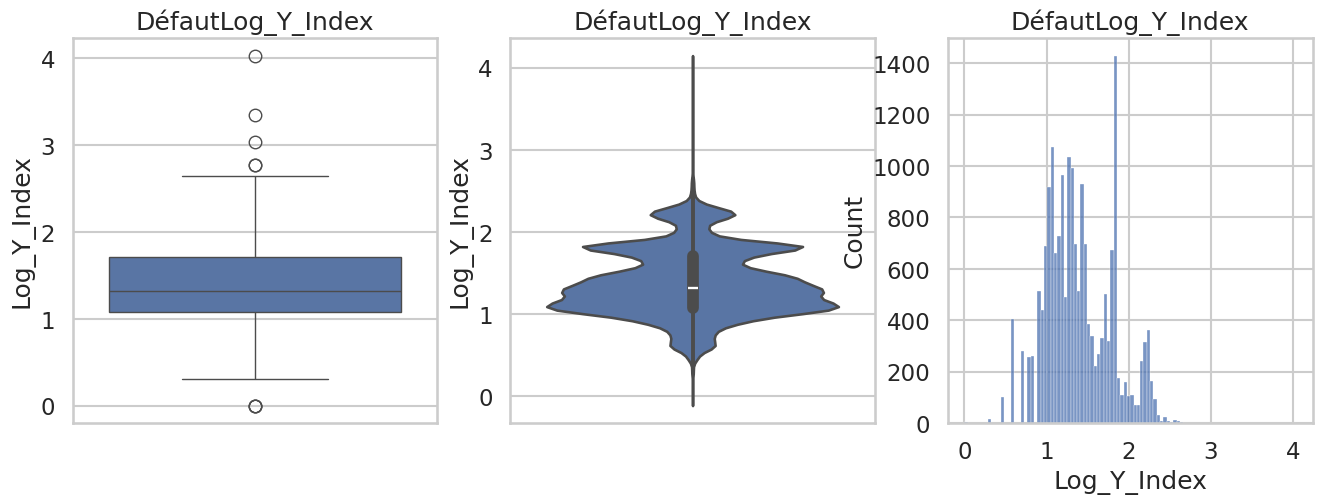

Il y a  8  outliers dans la variable Log_Y_Index sur  19219 échantillons.
Outliers within the box plot are : id
2941     4.0333
3436     3.3508
3578     0.0000
3901     0.0000
9347     2.7760
11117    2.7760
11795    0.0000
16083    3.0394
Name: Log_Y_Index, dtype: float64


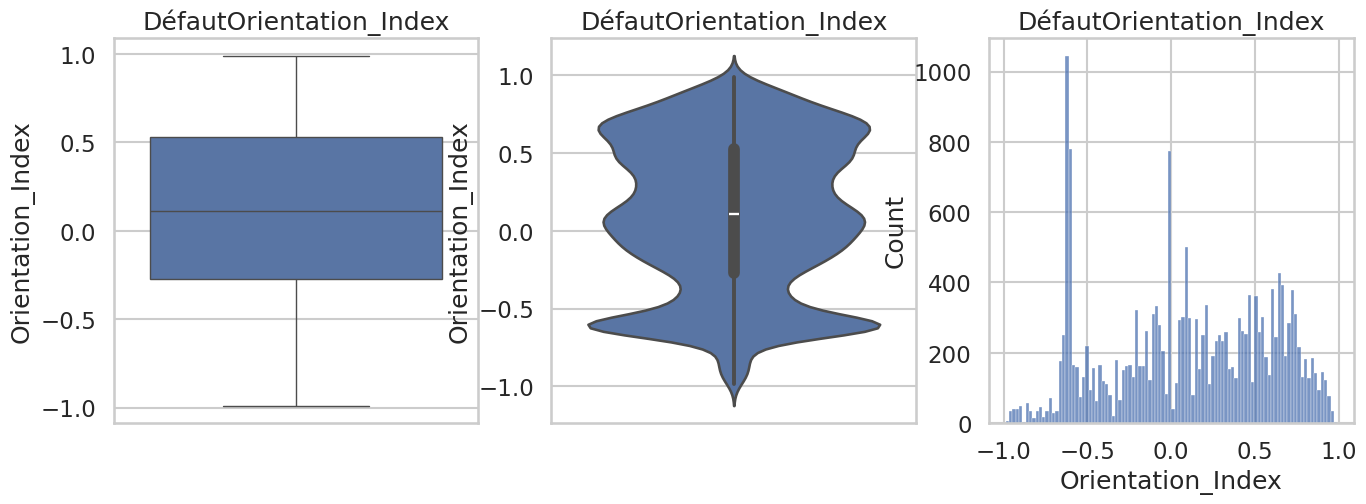

Il y a  0  outliers dans la variable Orientation_Index sur  19219 échantillons.


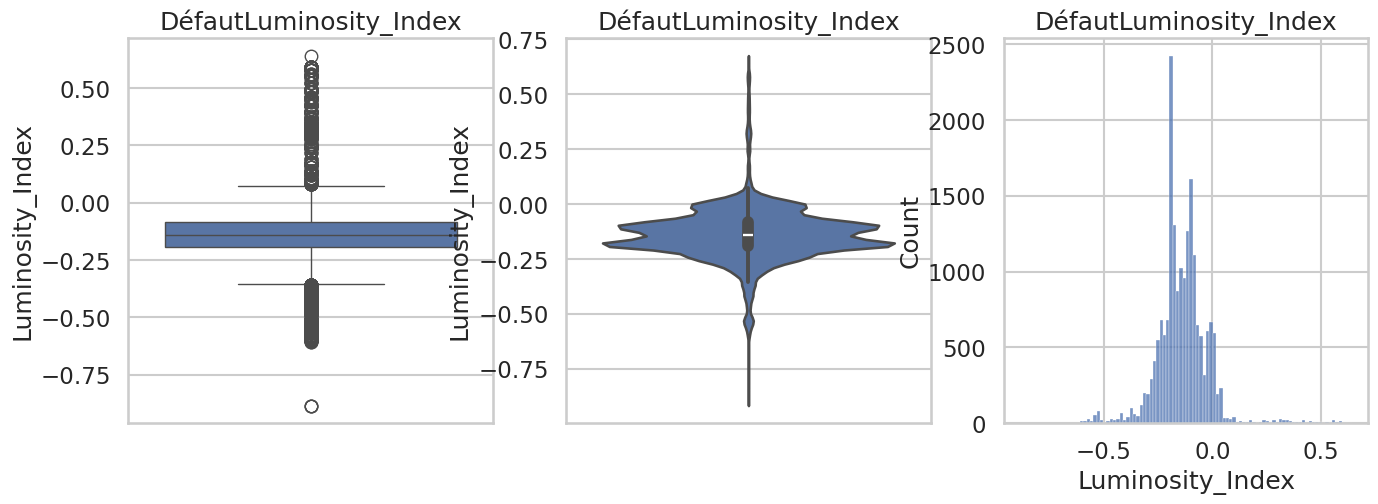

Il y a  999  outliers dans la variable Luminosity_Index sur  19219 échantillons.
Il y a trop d'outliers pour les afficher


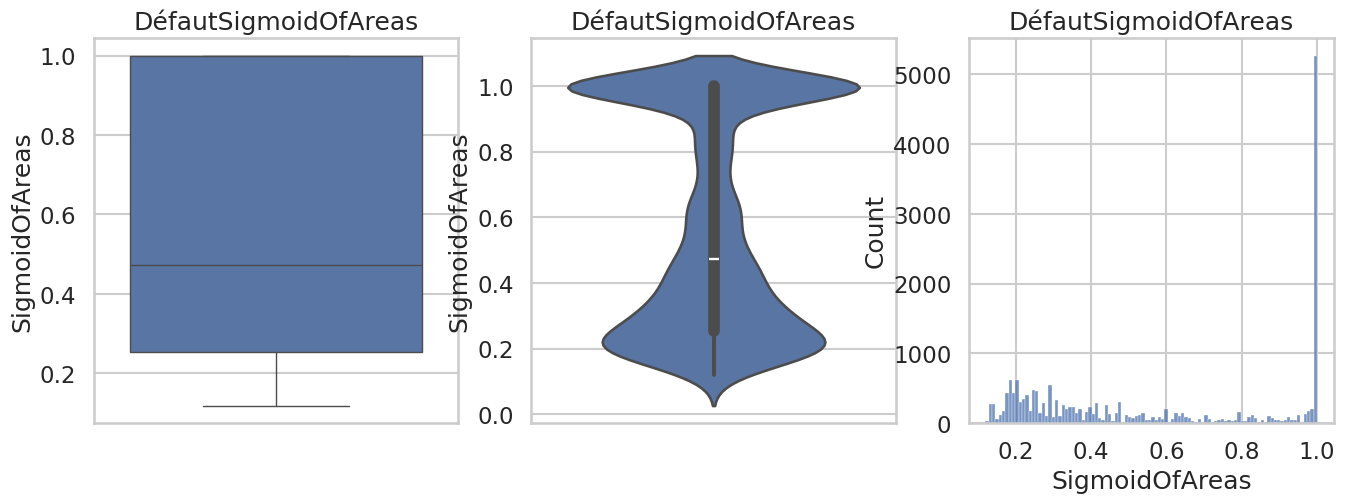

Il y a  0  outliers dans la variable SigmoidOfAreas sur  19219 échantillons.


In [44]:
for feature in features:
    visualisation_distrib_variable(df=df,nom_variable=feature,figsize=(16,5))

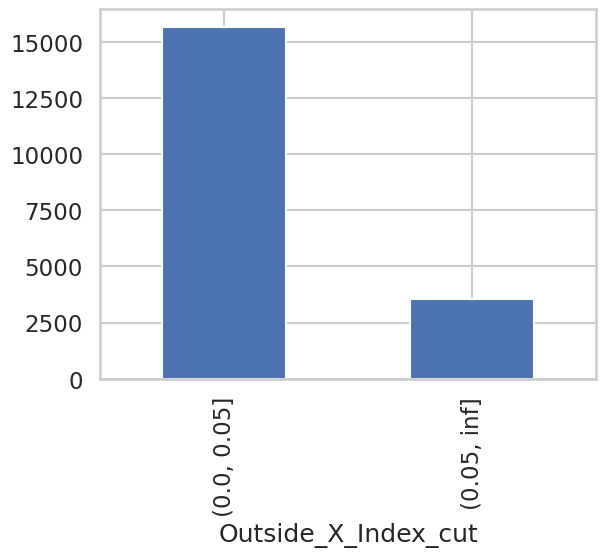

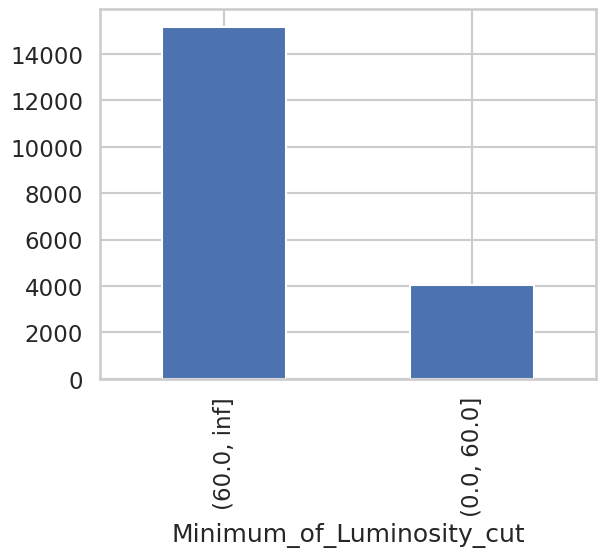

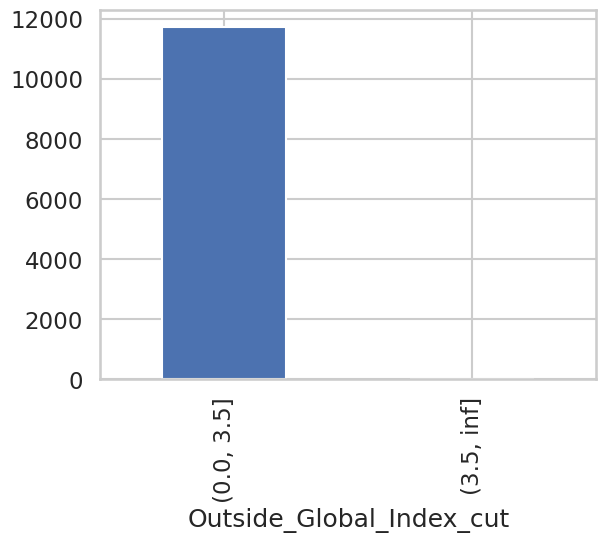

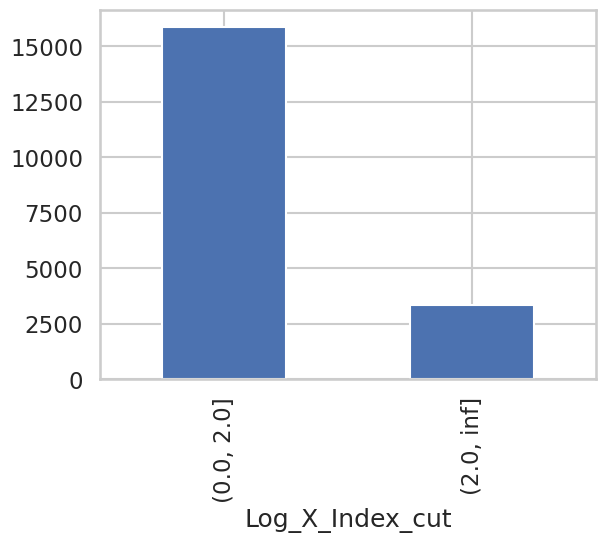

In [45]:
# Différenciation des distributions pour celles présentant deux pics

#Outside_X_Index
bins = pd.IntervalIndex.from_tuples([(0,0.05), (0.05,float("inf"))])
df['Outside_X_Index_cut'] = pd.cut(df['Outside_X_Index'],bins)
#compter par nombre
rev_values = df['Outside_X_Index_cut'].value_counts()
rev_values.plot.bar()
plt.show()

#Minimum_of_Luminosity
bins = pd.IntervalIndex.from_tuples([(0,60), (60,float("inf"))])
df['Minimum_of_Luminosity_cut'] = pd.cut(df['Minimum_of_Luminosity'],bins)
#compter par nombre
rev_values = df['Minimum_of_Luminosity_cut'].value_counts()
rev_values.plot.bar()
plt.show()

#Outside_Global_Index
bins = pd.IntervalIndex.from_tuples([(0,3.5), (3.5,float("inf"))])
df['Outside_Global_Index_cut'] = pd.cut(df['Outside_Global_Index'],bins)
#compter par nombre
rev_values = df['Outside_Global_Index_cut'].value_counts()
rev_values.plot.bar()
plt.show()

#Log_X_Index
bins = pd.IntervalIndex.from_tuples([(0,2), (2,float("inf"))])
df['Log_X_Index_cut'] = pd.cut(df['Log_X_Index'],bins)
#compter par nombre
rev_values = df['Log_X_Index_cut'].value_counts()
rev_values.plot.bar()
plt.show()


<Axes: xlabel='TypeOfSteel_A300'>

<Axes: xlabel='TypeOfSteel_A300'>

<Axes: xlabel='TypeOfSteel_A300'>

<Axes: xlabel='TypeOfSteel_A300'>

<Axes: xlabel='TypeOfSteel_A300'>

<Axes: xlabel='TypeOfSteel_A300'>

<Axes: xlabel='TypeOfSteel_A300'>

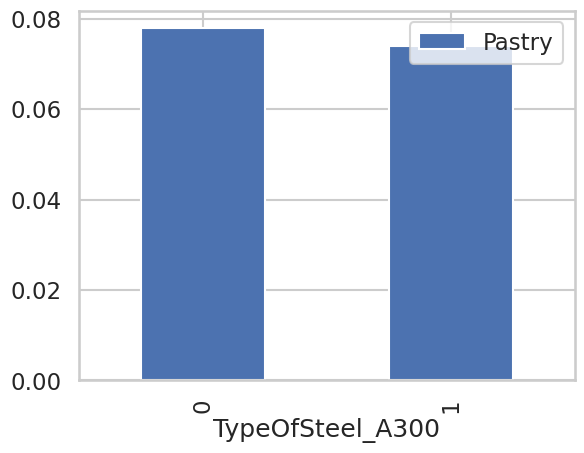

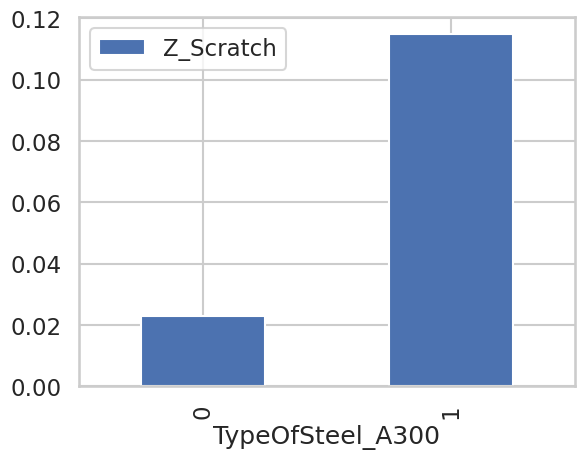

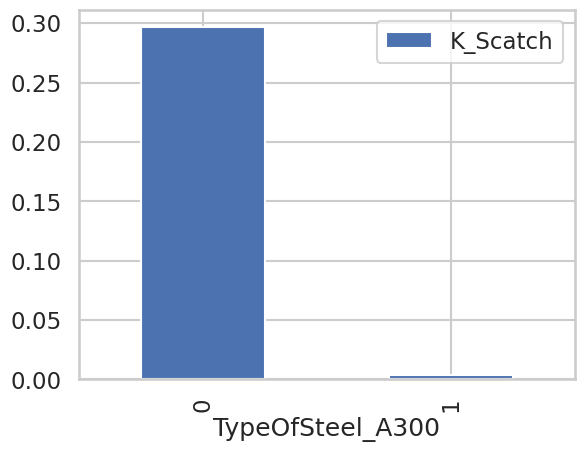

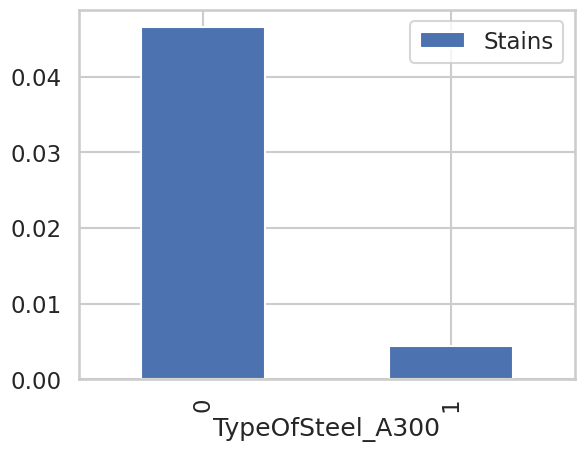

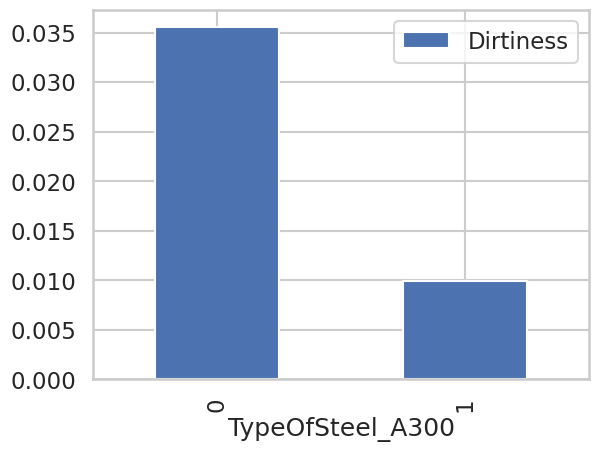

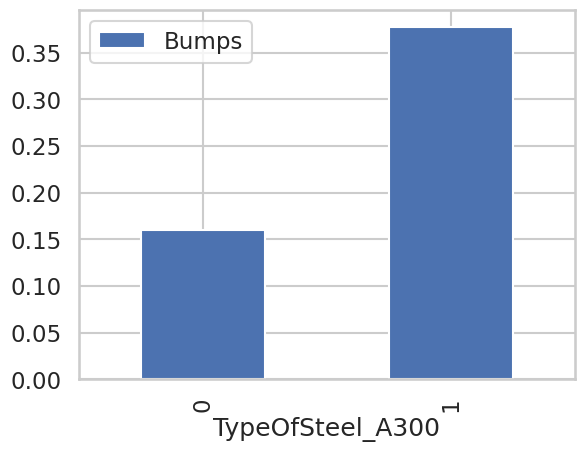

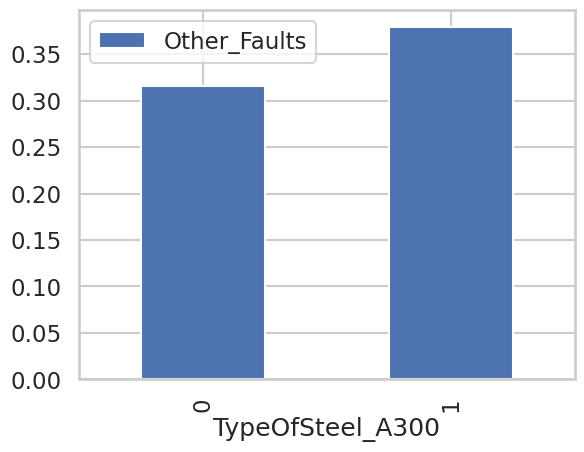

In [64]:
# pivot table to explore values. A basic pivot table takes the average of these different categories we choose.

for target in targets:
    display(        
    pd.pivot_table(df, index = 'TypeOfSteel_A300', values = target).plot.bar()
    )    

In [65]:
# On peut aussi faire de la sorte :
for feature in features:
    print(feature), " :"
    display(df.groupby('Pastry')[feature].describe().transpose())

X_Minimum


Pastry             0            1
count   17753.000000  1466.000000
mean      691.631612   930.532742
std       526.730631   540.095119
min         0.000000     0.000000
25%        43.000000   556.250000
50%       755.000000  1050.500000
75%      1135.000000  1330.750000
max      1705.000000  1705.000000

X_Maximum


Pastry             0            1
count   17753.000000  1466.000000
mean      738.229482   943.111869
std       493.181428   539.709417
min         4.000000     4.000000
25%       214.000000   570.250000
50%       774.000000  1063.000000
75%      1150.000000  1340.000000
max      1713.000000  1713.000000

Y_Minimum


Pastry             0             1
count   1.775300e+04  1.466000e+03
mean    1.858241e+06  1.747004e+06
std     1.905428e+06  1.878314e+06
min     6.712000e+03  7.003000e+03
25%     6.631380e+05  5.187472e+05
50%     1.411801e+06  1.225386e+06
75%     2.368235e+06  2.277931e+06
max     1.298766e+07  1.298766e+07

Y_Maximum


Pastry             0             1
count   1.775300e+04  1.466000e+03
mean    1.855480e+06  1.739134e+06
std     1.898031e+06  1.872446e+06
min     6.724000e+03  7.020000e+03
25%     6.631710e+05  5.107810e+05
50%     1.411815e+06  1.219222e+06
75%     2.368203e+06  2.277688e+06
max     1.298769e+07  1.298769e+07

Pixels_Areas


Pastry              0             1
count    17753.000000   1466.000000
mean      1792.568242    369.095498
std       3854.023588    826.501080
min          6.000000     12.000000
25%         88.000000    106.000000
50%        168.000000    169.000000
75%        695.000000    313.000000
max     152655.000000  17810.000000

X_Perimeter


Pastry             0            1
count   17753.000000  1466.000000
mean      100.985298    31.101637
std       183.587322    43.321560
min         2.000000     4.000000
25%        15.000000    13.000000
50%        25.000000    19.000000
75%        70.000000    32.000000
max      7553.000000   705.000000

Y_Perimeter


Pastry             0            1
count   17753.000000  1466.000000
mean       66.010590    41.278990
std       103.745525    54.539693
min         1.000000     3.000000
25%        13.000000    17.000000
50%        23.000000    26.000000
75%        67.000000    42.000000
max       903.000000   604.000000

Sum_of_Luminosity


Pastry             0             1
count   1.775300e+04  1.466000e+03
mean    2.036797e+05  4.855117e+04
std     4.555314e+05  1.624033e+05
min     2.500000e+02  1.732000e+03
25%     9.693000e+03  1.113750e+04
50%     1.840200e+04  1.756400e+04
75%     7.643800e+04  3.151500e+04
max     1.159141e+07  2.712104e+06

Minimum_of_Luminosity


Pastry             0            1
count   17753.000000  1466.000000
mean       84.846674    84.345157
std        29.287212    22.070371
min         0.000000    11.000000
25%        68.000000    75.000000
50%        91.000000    87.000000
75%       106.000000    97.000000
max       196.000000   190.000000

Maximum_of_Luminosity


Pastry             0            1
count   17753.000000  1466.000000
mean      128.998592   124.394270
std        14.122347    14.411981
min        39.000000    71.000000
25%       124.000000   119.000000
50%       127.000000   126.000000
75%       135.000000   132.000000
max       253.000000   207.000000

Length_of_Conveyer


Pastry             0            1
count   17753.000000  1466.000000
mean     1452.713570  1539.725784
std       142.413305   158.799652
min      1227.000000  1227.000000
25%      1358.000000  1362.000000
50%      1362.000000  1648.000000
75%      1650.000000  1688.000000
max      1794.000000  1715.000000

TypeOfSteel_A300


Pastry             0            1
count   17753.000000  1466.000000
mean        0.403706     0.390177
std         0.490654     0.487956
min         0.000000     0.000000
25%         0.000000     0.000000
50%         0.000000     0.000000
75%         1.000000     1.000000
max         1.000000     1.000000

TypeOfSteel_A400


Pastry             0            1
count   17753.000000  1466.000000
mean        0.595280     0.609141
std         0.490852     0.488109
min         0.000000     0.000000
25%         0.000000     0.000000
50%         1.000000     1.000000
75%         1.000000     1.000000
max         1.000000     1.000000

Steel_Plate_Thickness


Pastry             0           1
count   17753.000000  1466.00000
mean       74.972737    91.23397
std        53.303467    59.01602
min        40.000000    40.00000
25%        40.000000    50.00000
50%        60.000000    70.00000
75%        80.000000   100.00000
max       300.000000   300.00000

Edges_Index


Pastry             0            1
count   17753.000000  1466.000000
mean        0.354711     0.331487
std         0.318477     0.324300
min         0.000000     0.000000
25%         0.059300     0.045500
50%         0.244100     0.176000
75%         0.656100     0.650000
max         0.995200     0.995200

Empty_Index


Pastry             0            1
count   17753.000000  1466.000000
mean        0.414076     0.351585
std         0.124955     0.096762
min         0.000000     0.000000
25%         0.322200     0.277800
50%         0.418800     0.339100
75%         0.500000     0.416500
max         0.927500     0.707400

Square_Index


Pastry             0            1
count   17753.000000  1466.000000
mean        0.585737     0.438688
std         0.258095     0.236166
min         0.008300     0.039300
25%         0.381500     0.266700
50%         0.565200     0.375000
75%         0.823500     0.583300
max         1.000000     1.000000

Outside_X_Index


Pastry             0            1
count   17753.000000  1466.000000
mean        0.032501     0.007699
std         0.048711     0.005566
min         0.001500     0.001500
25%         0.006600     0.005300
50%         0.009800     0.006600
75%         0.021800     0.008800
max         0.665100     0.128900

Edges_X_Index


Pastry             0            1
count   17753.000000  1466.000000
mean        0.621250     0.536030
std         0.221317     0.220348
min         0.070400     0.014400
25%         0.468800     0.363600
50%         0.640000     0.500000
75%         0.790700     0.714300
max         1.000000     1.000000

Edges_Y_Index


Pastry             0            1
count   17753.000000  1466.000000
mean        0.818840     0.986801
std         0.224665     0.052972
min         0.105000     0.285700
25%         0.600000     1.000000
50%         0.944400     1.000000
75%         1.000000     1.000000
max         1.000000     1.000000

Outside_Global_Index


Pastry             0            1
count   17753.000000  1466.000000
mean        0.560902     0.967258
std         0.486477     0.167145
min         0.000000     0.000000
25%         0.000000     1.000000
50%         1.000000     1.000000
75%         1.000000     1.000000
max         1.000000     1.000000

LogOfAreas


Pastry             0            1
count   17753.000000  1466.000000
mean        2.488465     2.291940
std         0.780345     0.417173
min         0.778200     1.079200
25%         1.944500     2.025300
50%         2.227900     2.227900
75%         2.848200     2.495500
max         4.554300     4.250700

Log_X_Index


Pastry             0            1
count   17753.000000  1466.000000
mean        1.336503     1.024012
std         0.476775     0.163041
min         0.301000     0.602100
25%         1.000000     0.903100
50%         1.146100     1.000000
75%         1.491400     1.113900
max         2.997300     2.243000

Log_Y_Index


Pastry             0            1
count   17753.000000  1466.000000
mean        1.385477     1.441316
std         0.410970     0.328730
min         0.000000     0.301000
25%         1.079200     1.230500
50%         1.301000     1.415000
75%         1.724300     1.612800
max         4.033300     2.776000

Orientation_Index


Pastry             0            1
count   17753.000000  1466.000000
mean        0.066124     0.546184
std         0.483639     0.269329
min        -0.988400    -0.906300
25%        -0.333300     0.409100
50%         0.076900     0.625000
75%         0.480000     0.733300
max         0.991700     0.960700

Luminosity_Index


Pastry             0            1
count   17753.000000  1466.000000
mean       -0.134805    -0.181693
std         0.119046     0.127379
min        -0.885000    -0.609600
25%        -0.191300    -0.240625
50%        -0.139300    -0.170500
75%        -0.080900    -0.116125
max         0.642100     0.591600

SigmoidOfAreas


Pastry             0            1
count   17753.000000  1466.000000
mean        0.575940     0.523001
std         0.334905     0.293486
min         0.119000     0.136100
25%         0.253200     0.271200
50%         0.472900     0.417000
75%         0.999800     0.795500
max         1.000000     1.000000

In [ ]:
# Possibilité de modifier les features sur cette base

X_Minimum


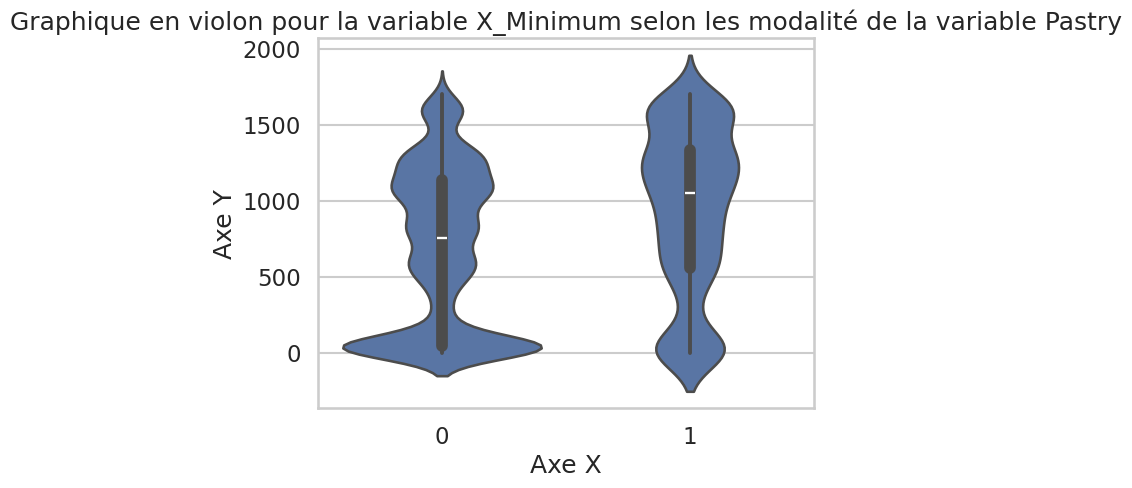

X_Maximum


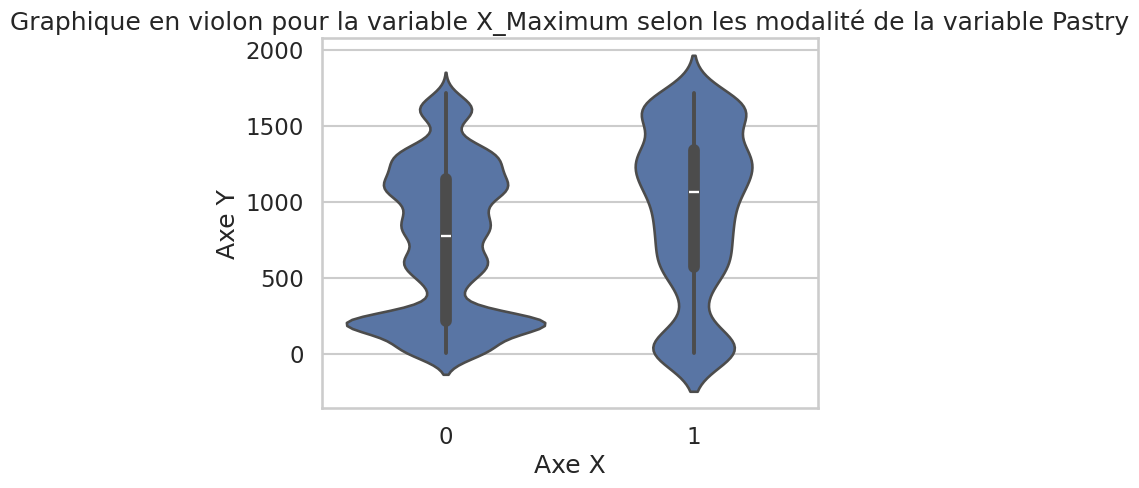

Y_Minimum


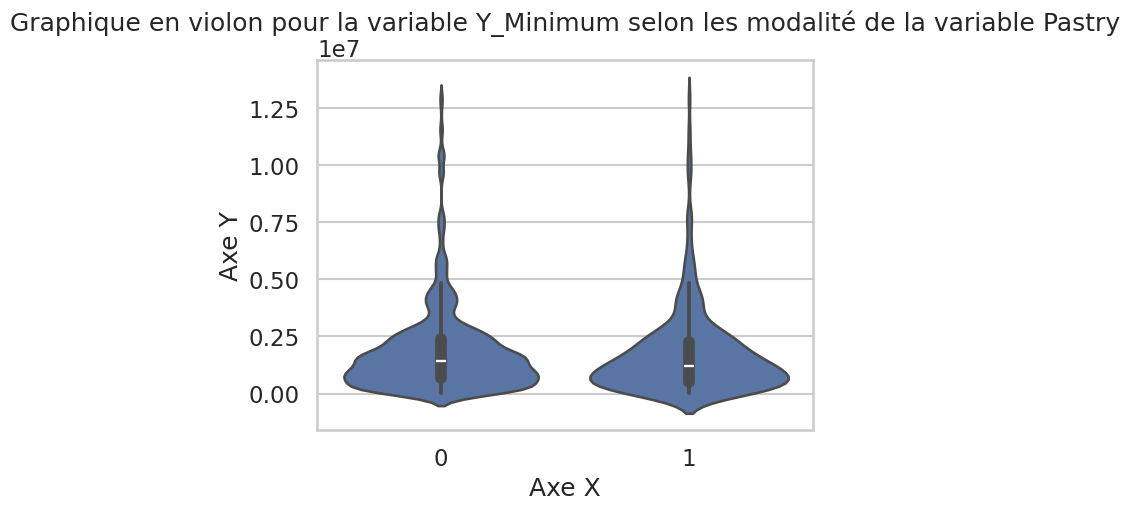

Y_Maximum


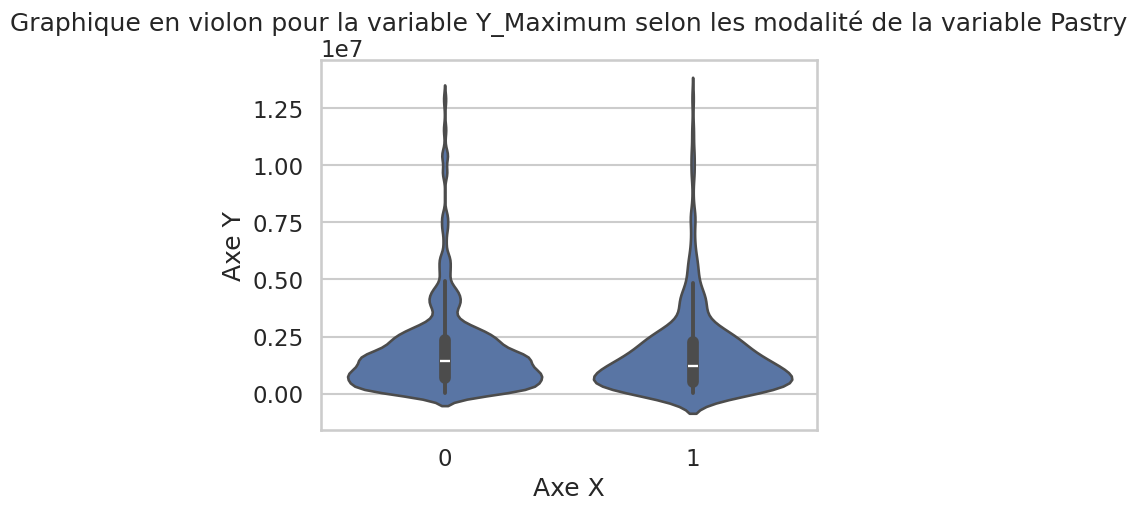

Pixels_Areas


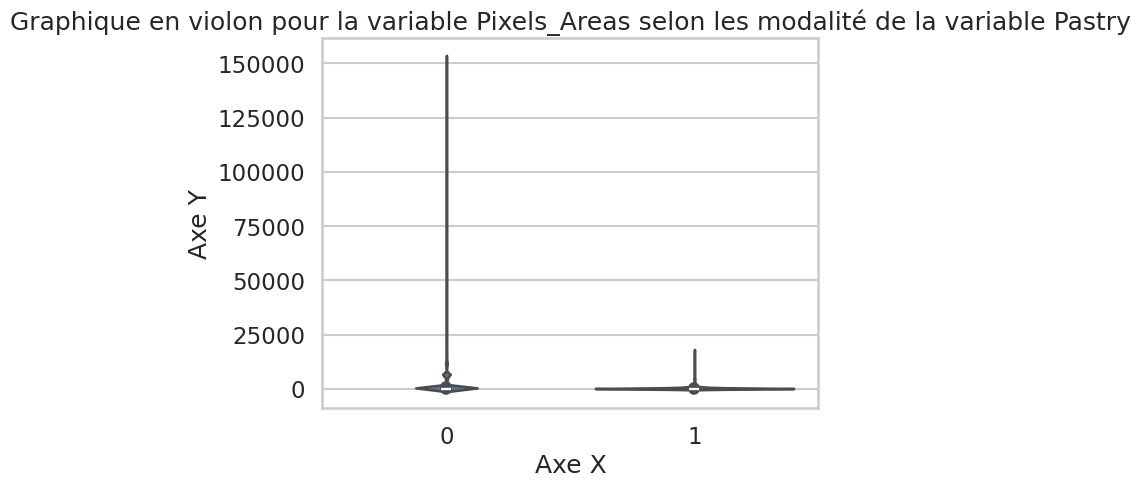

X_Perimeter


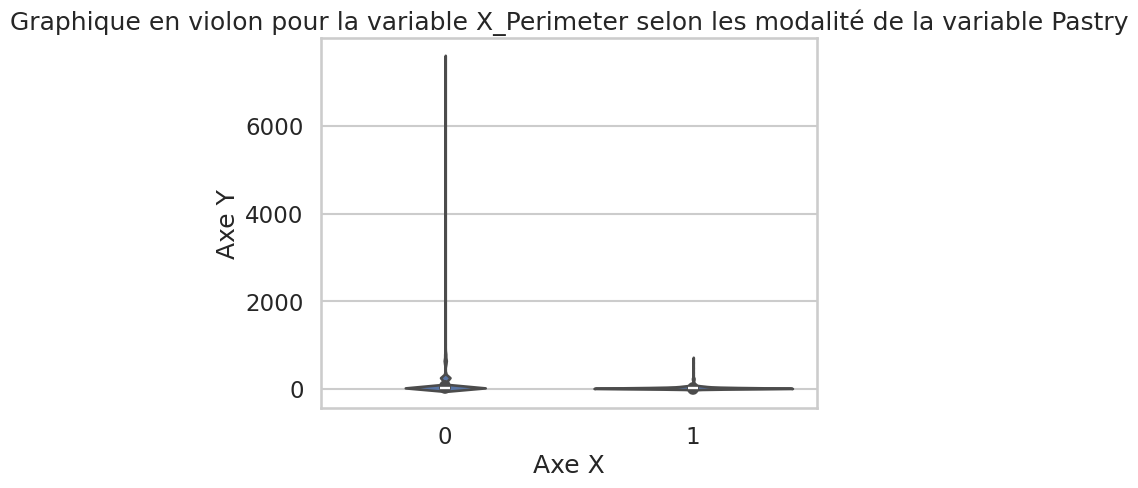

Y_Perimeter


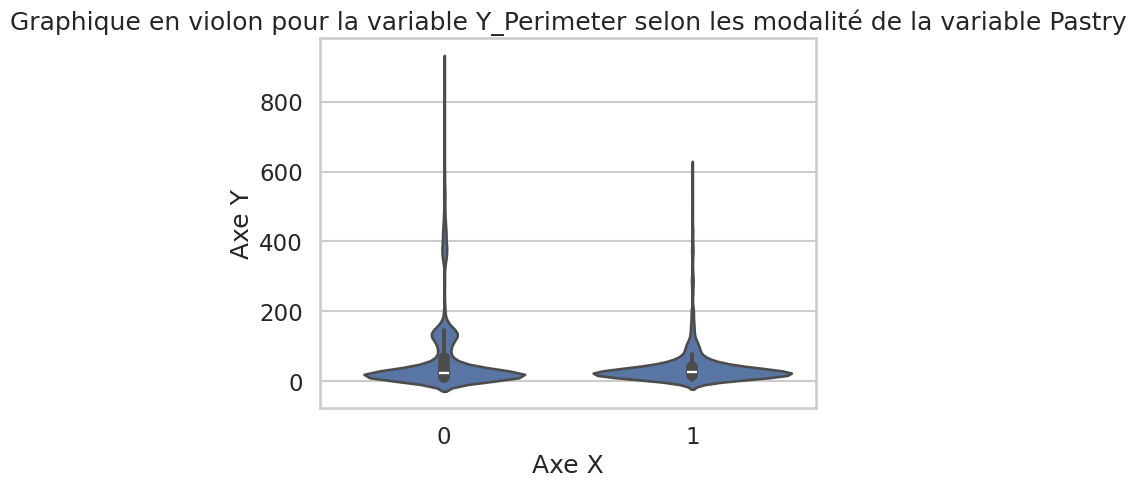

Sum_of_Luminosity


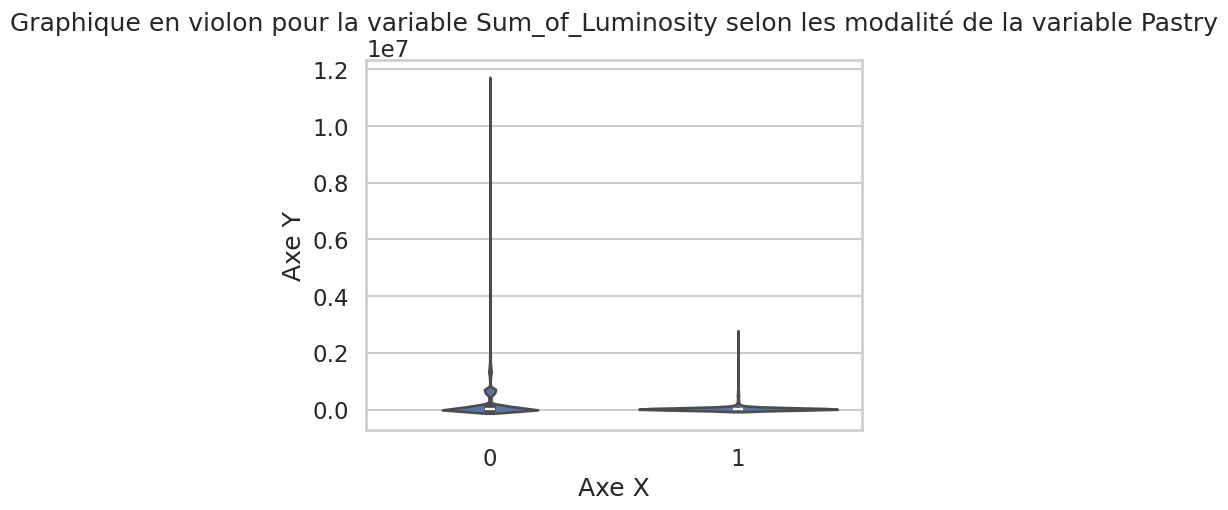

Minimum_of_Luminosity


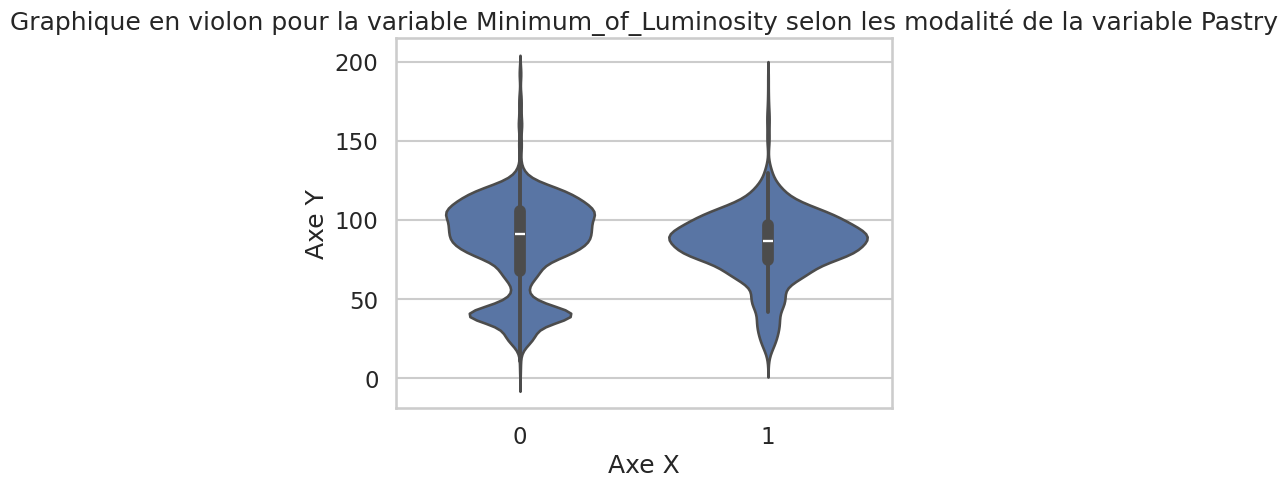

Maximum_of_Luminosity


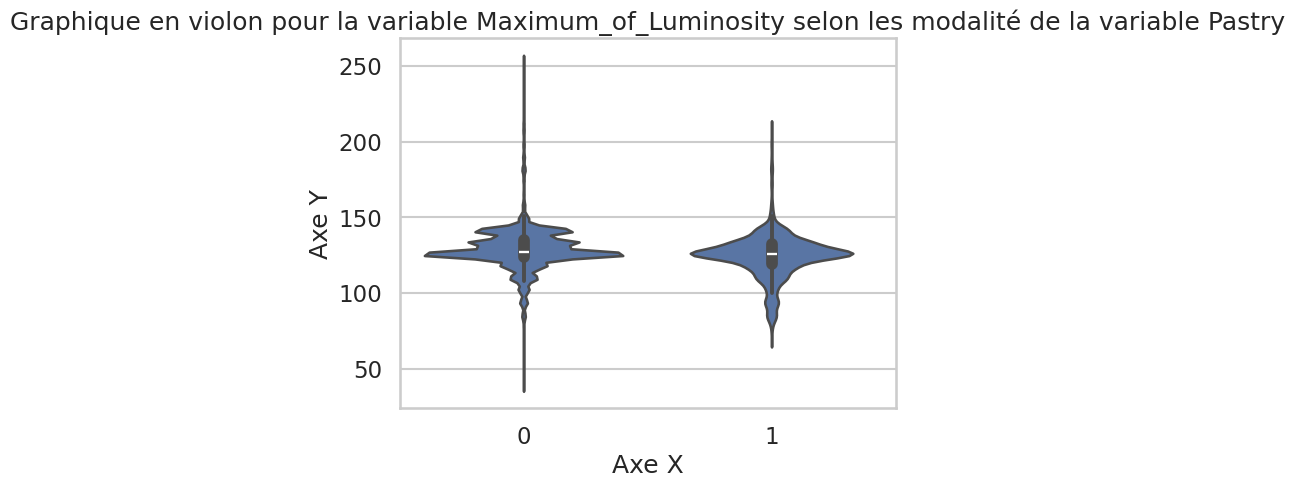

Length_of_Conveyer


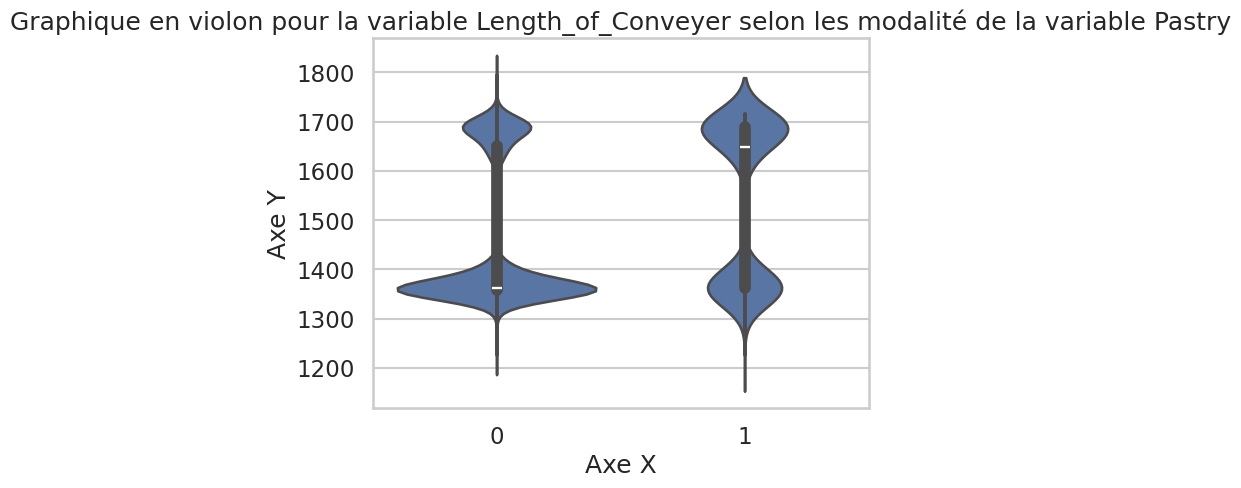

TypeOfSteel_A300


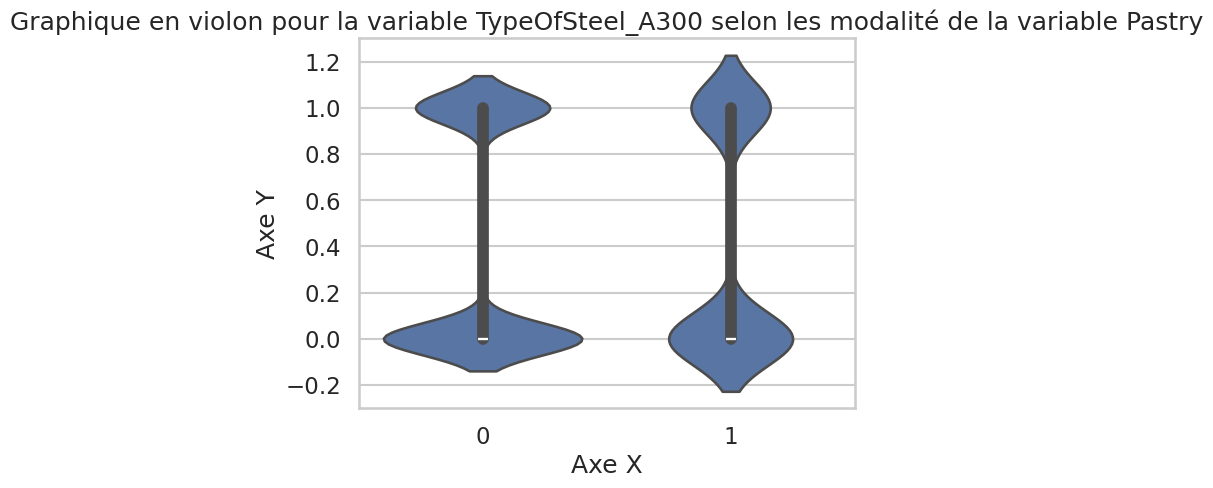

TypeOfSteel_A400


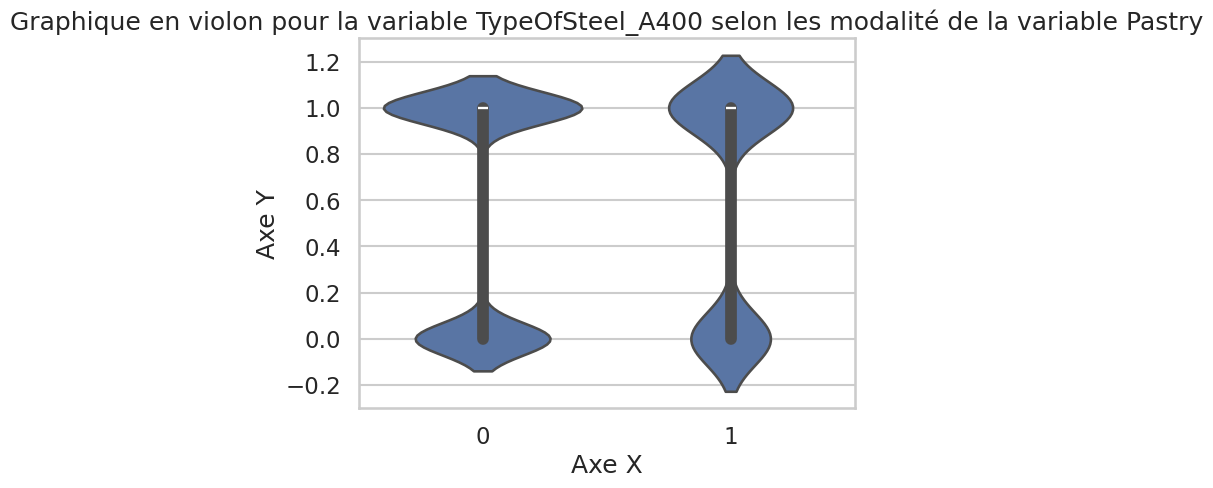

Steel_Plate_Thickness


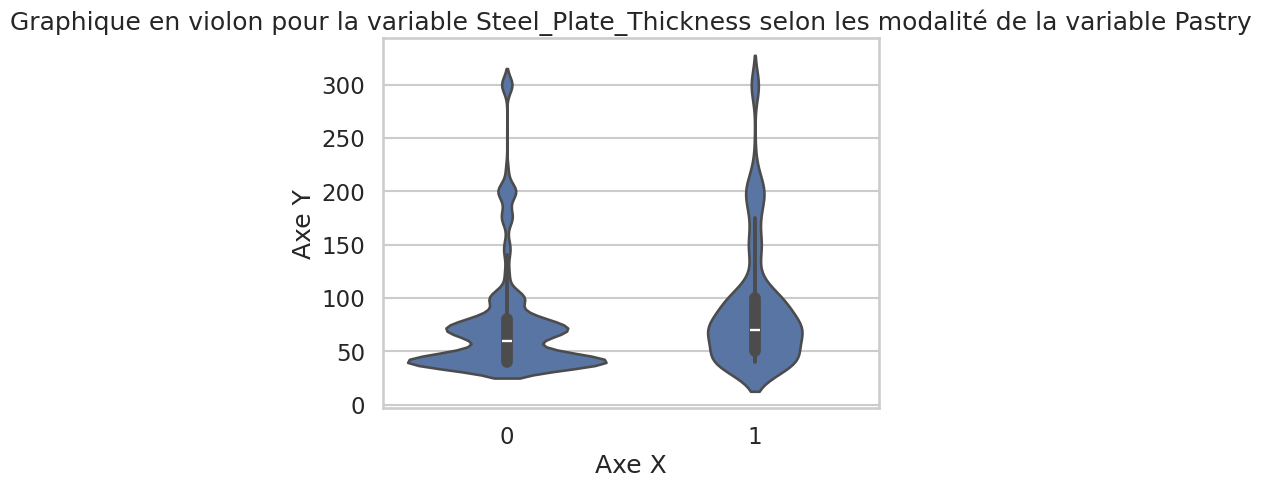

Edges_Index


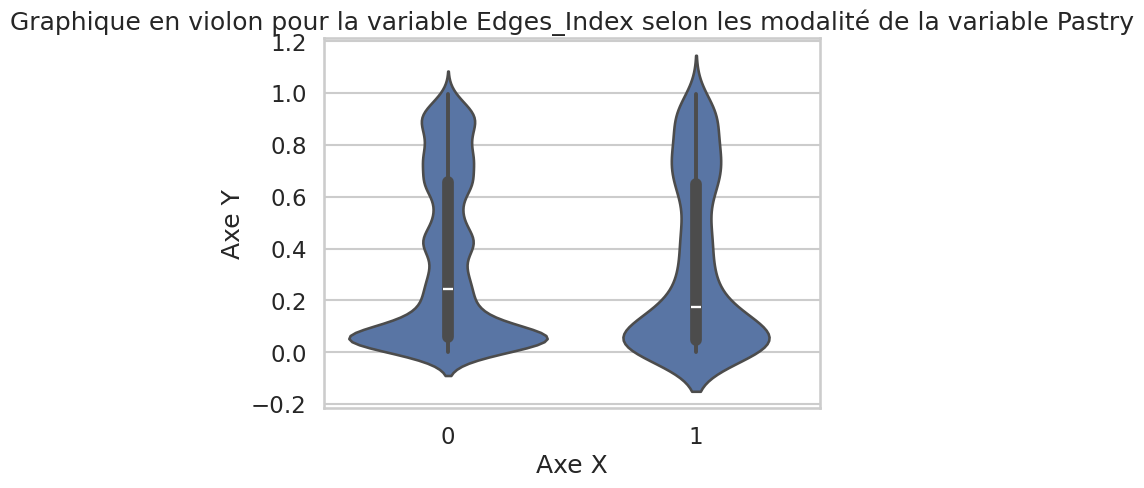

Empty_Index


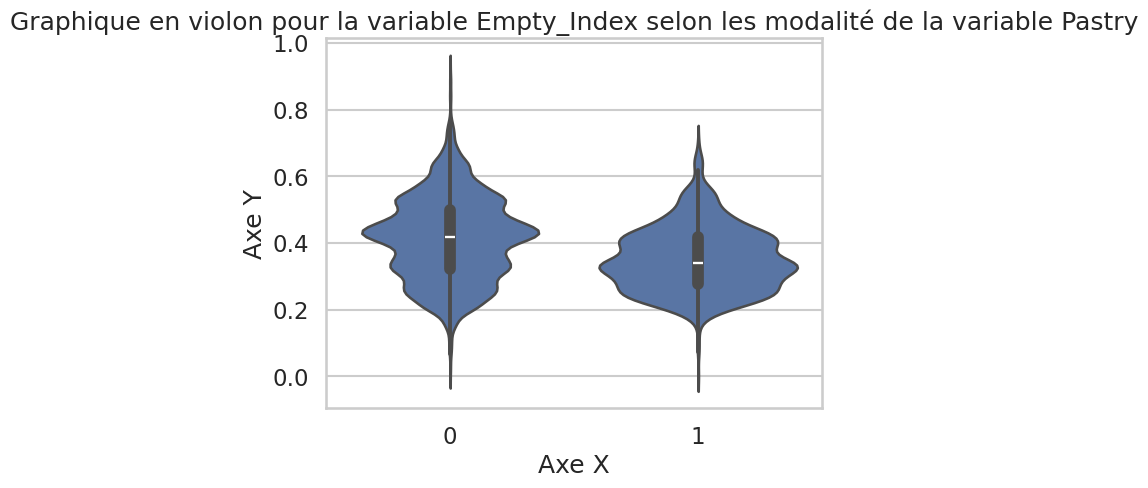

Square_Index


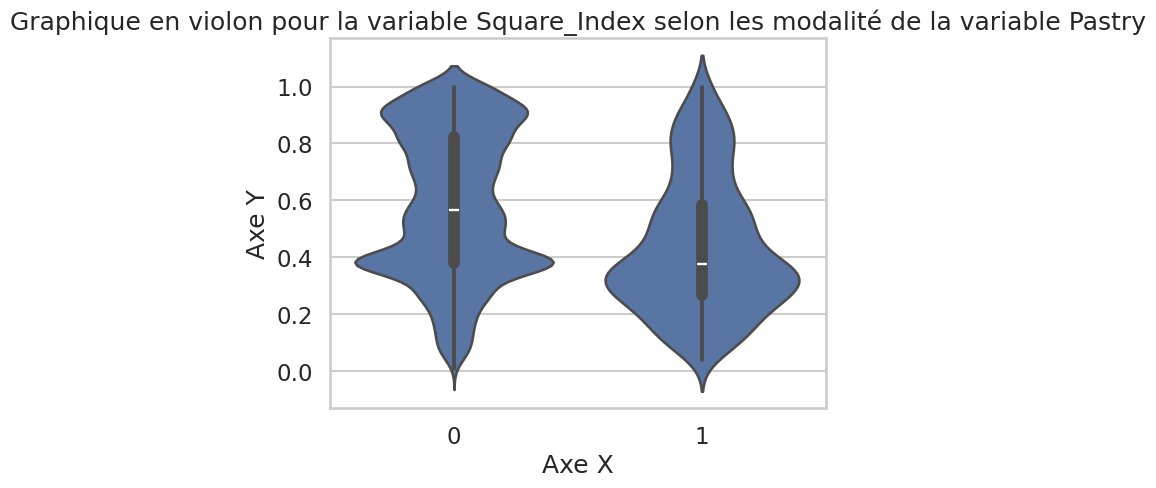

Outside_X_Index


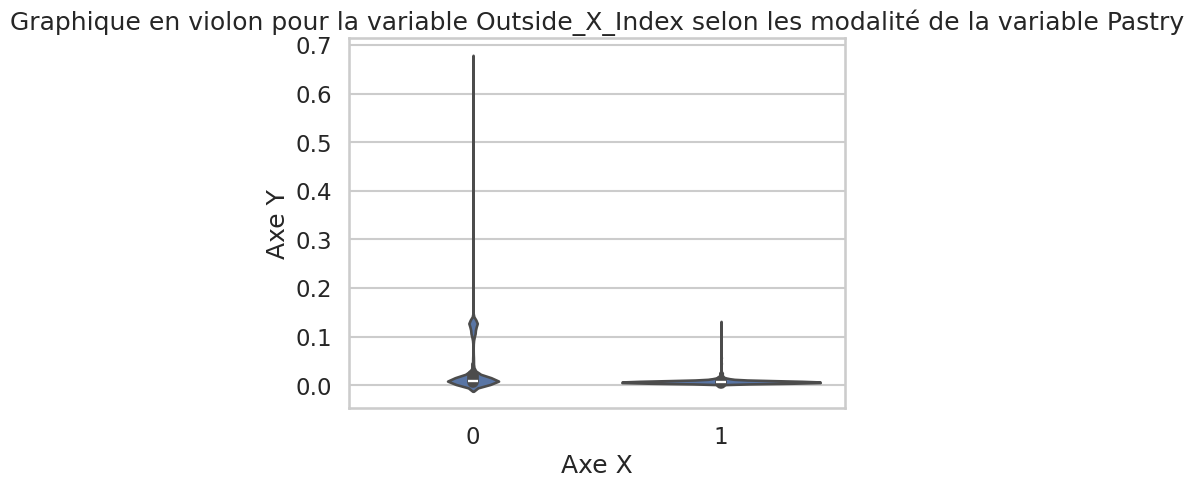

Edges_X_Index


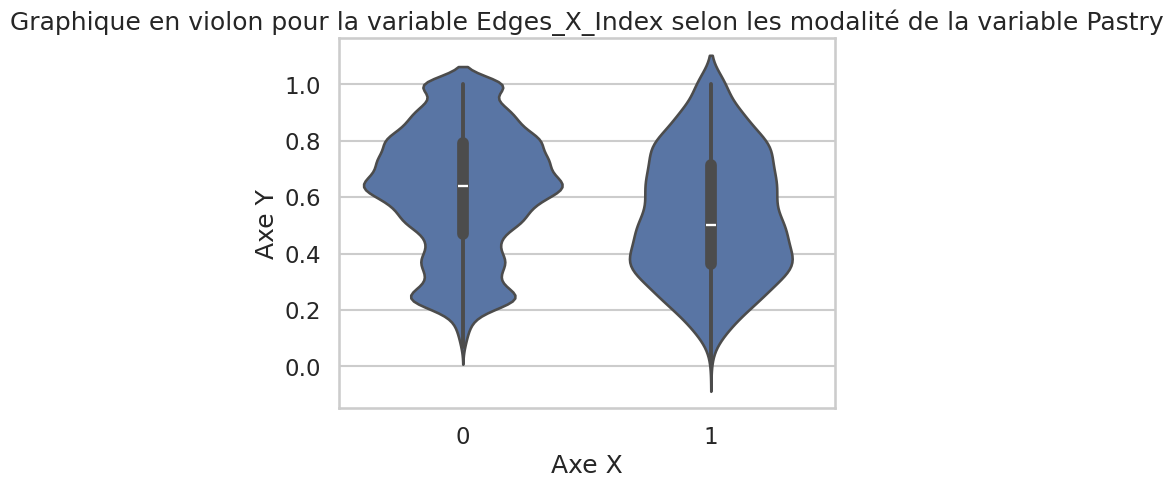

Edges_Y_Index


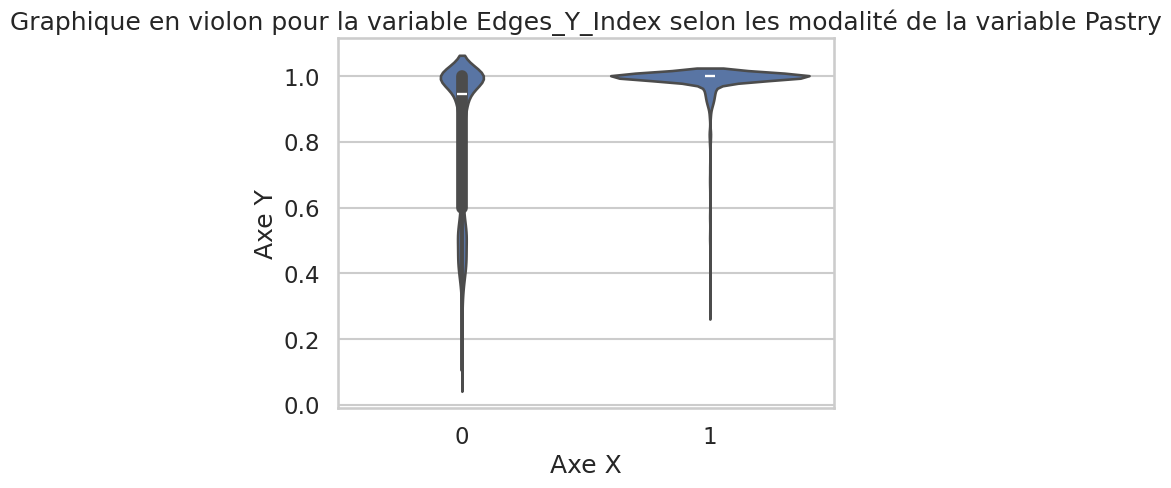

Outside_Global_Index


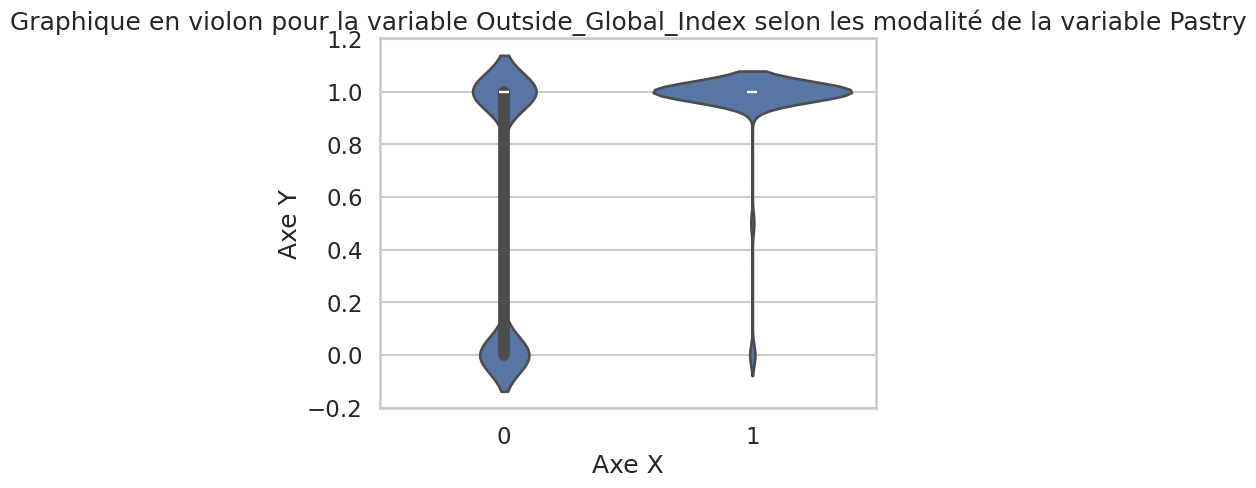

LogOfAreas


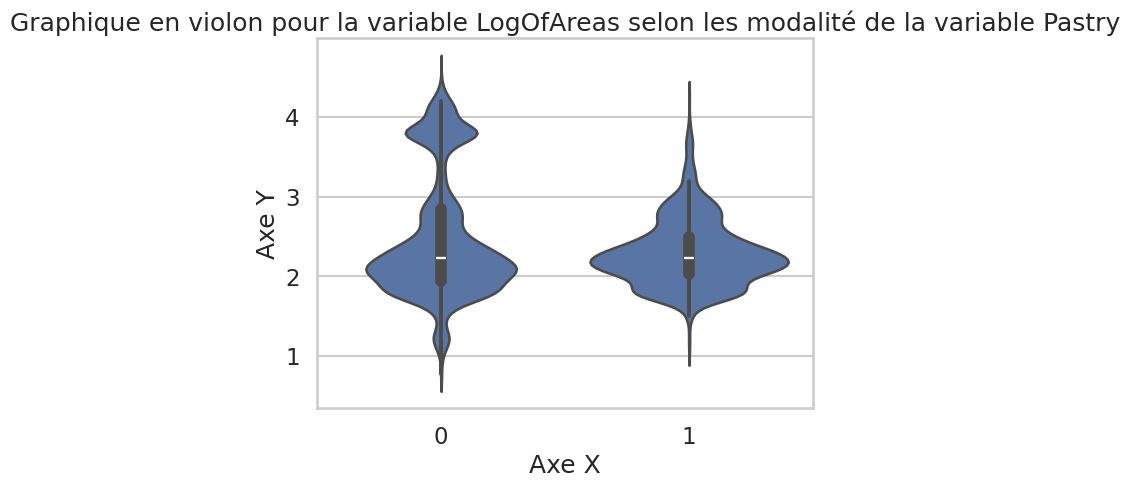

Log_X_Index


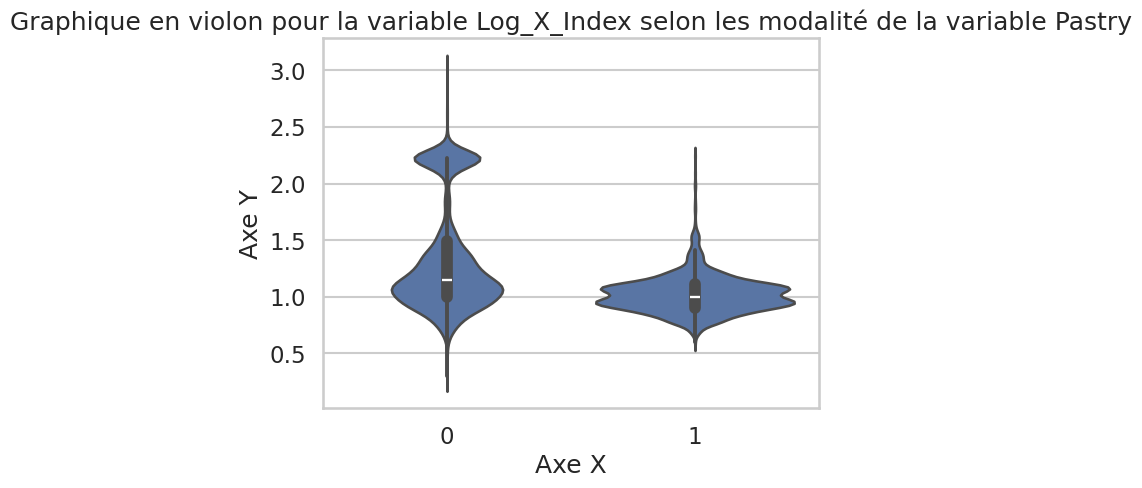

Log_Y_Index


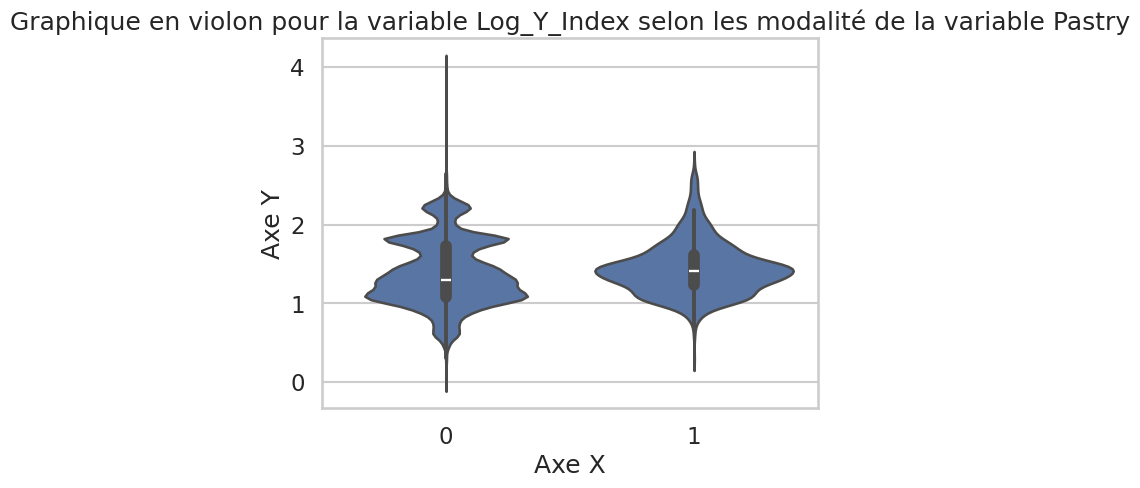

Orientation_Index


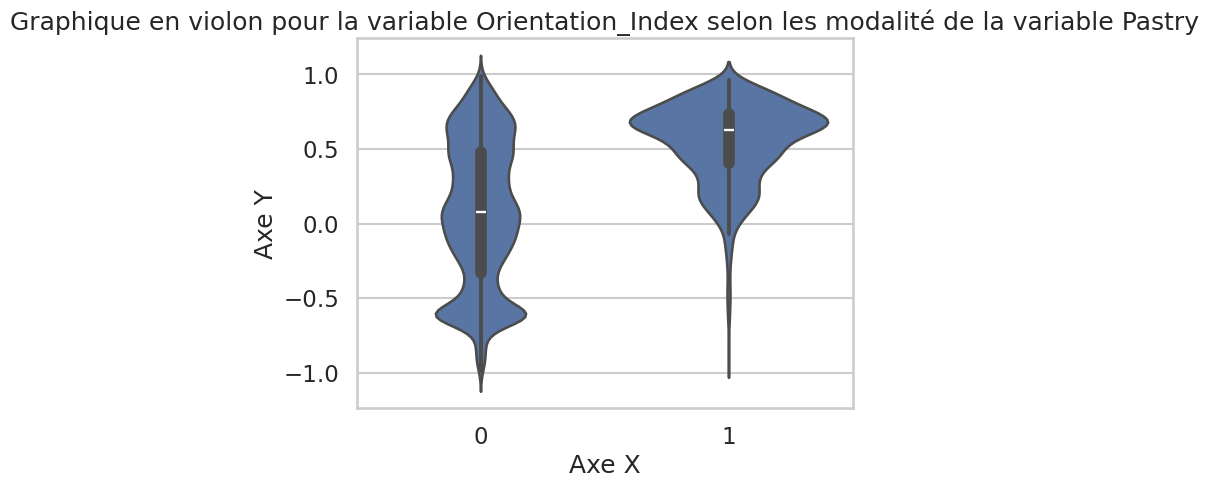

Luminosity_Index


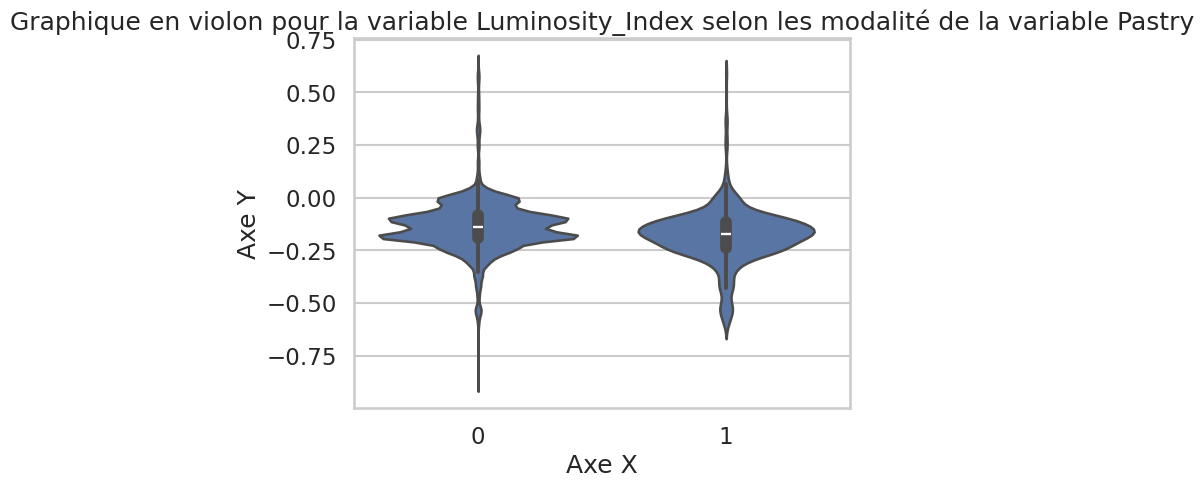

SigmoidOfAreas


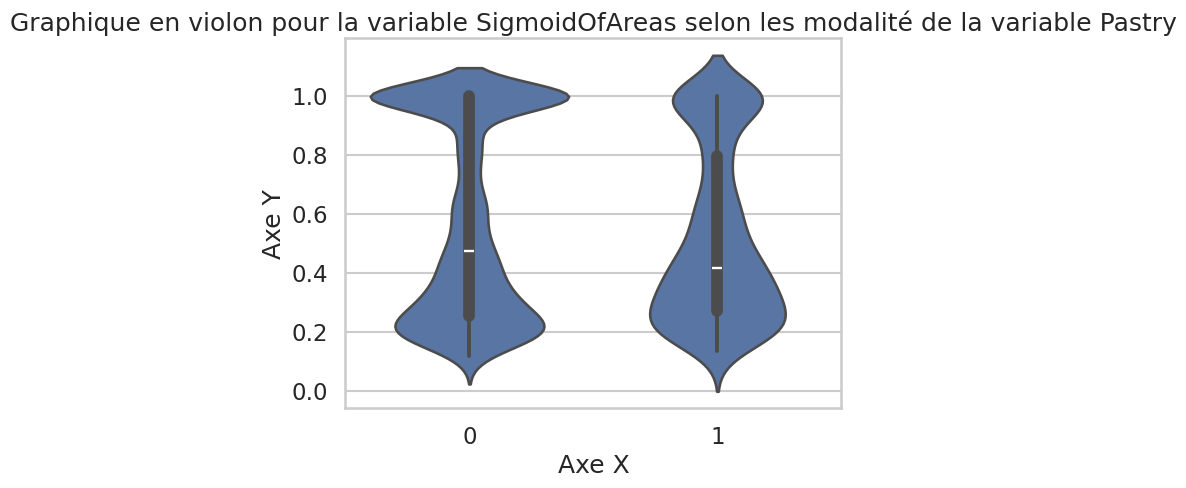

In [46]:
# Visualisation de l'impact des défzuts sur la distribution des échantillons

for feature in features:
    # Relationn Variables et cibles
    # # Tracé d'un graphique en violon pour le défaut "Pastry"
    print(feature)
    sns.violinplot(data=df, x='Pastry', y=feature)
    plt.title(f'Graphique en violon pour la variable {feature} selon les modalité de la variable Pastry')
    plt.xlabel('Axe X')
    plt.ylabel('Axe Y')
    # Affichage du graphique
    plt.show()

In [62]:
# Proportion de valeurs extremes
# Extraire uniquement les colonnes numériques
df_num = df._get_numeric_data()

for i in df_num .columns[:-7]:
    if df_num[i].dtypes != "object":
        Q1 = df_num[i].quantile(0.25)
        Q3 = df_num[i].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_num ["extreme_" + i] = df_num[i].apply(lambda x: 1 if (x < lower_bound or x > upper_bound) else 0)

liste_name_colonne = []
liste_proportion_extreme = []
for i in df_num .columns:
    if "extreme_" in i:
        liste_name_colonne.append(i)
        proportion = df_num [i].sum()/len(df_num)
        liste_proportion_extreme.append(proportion)        

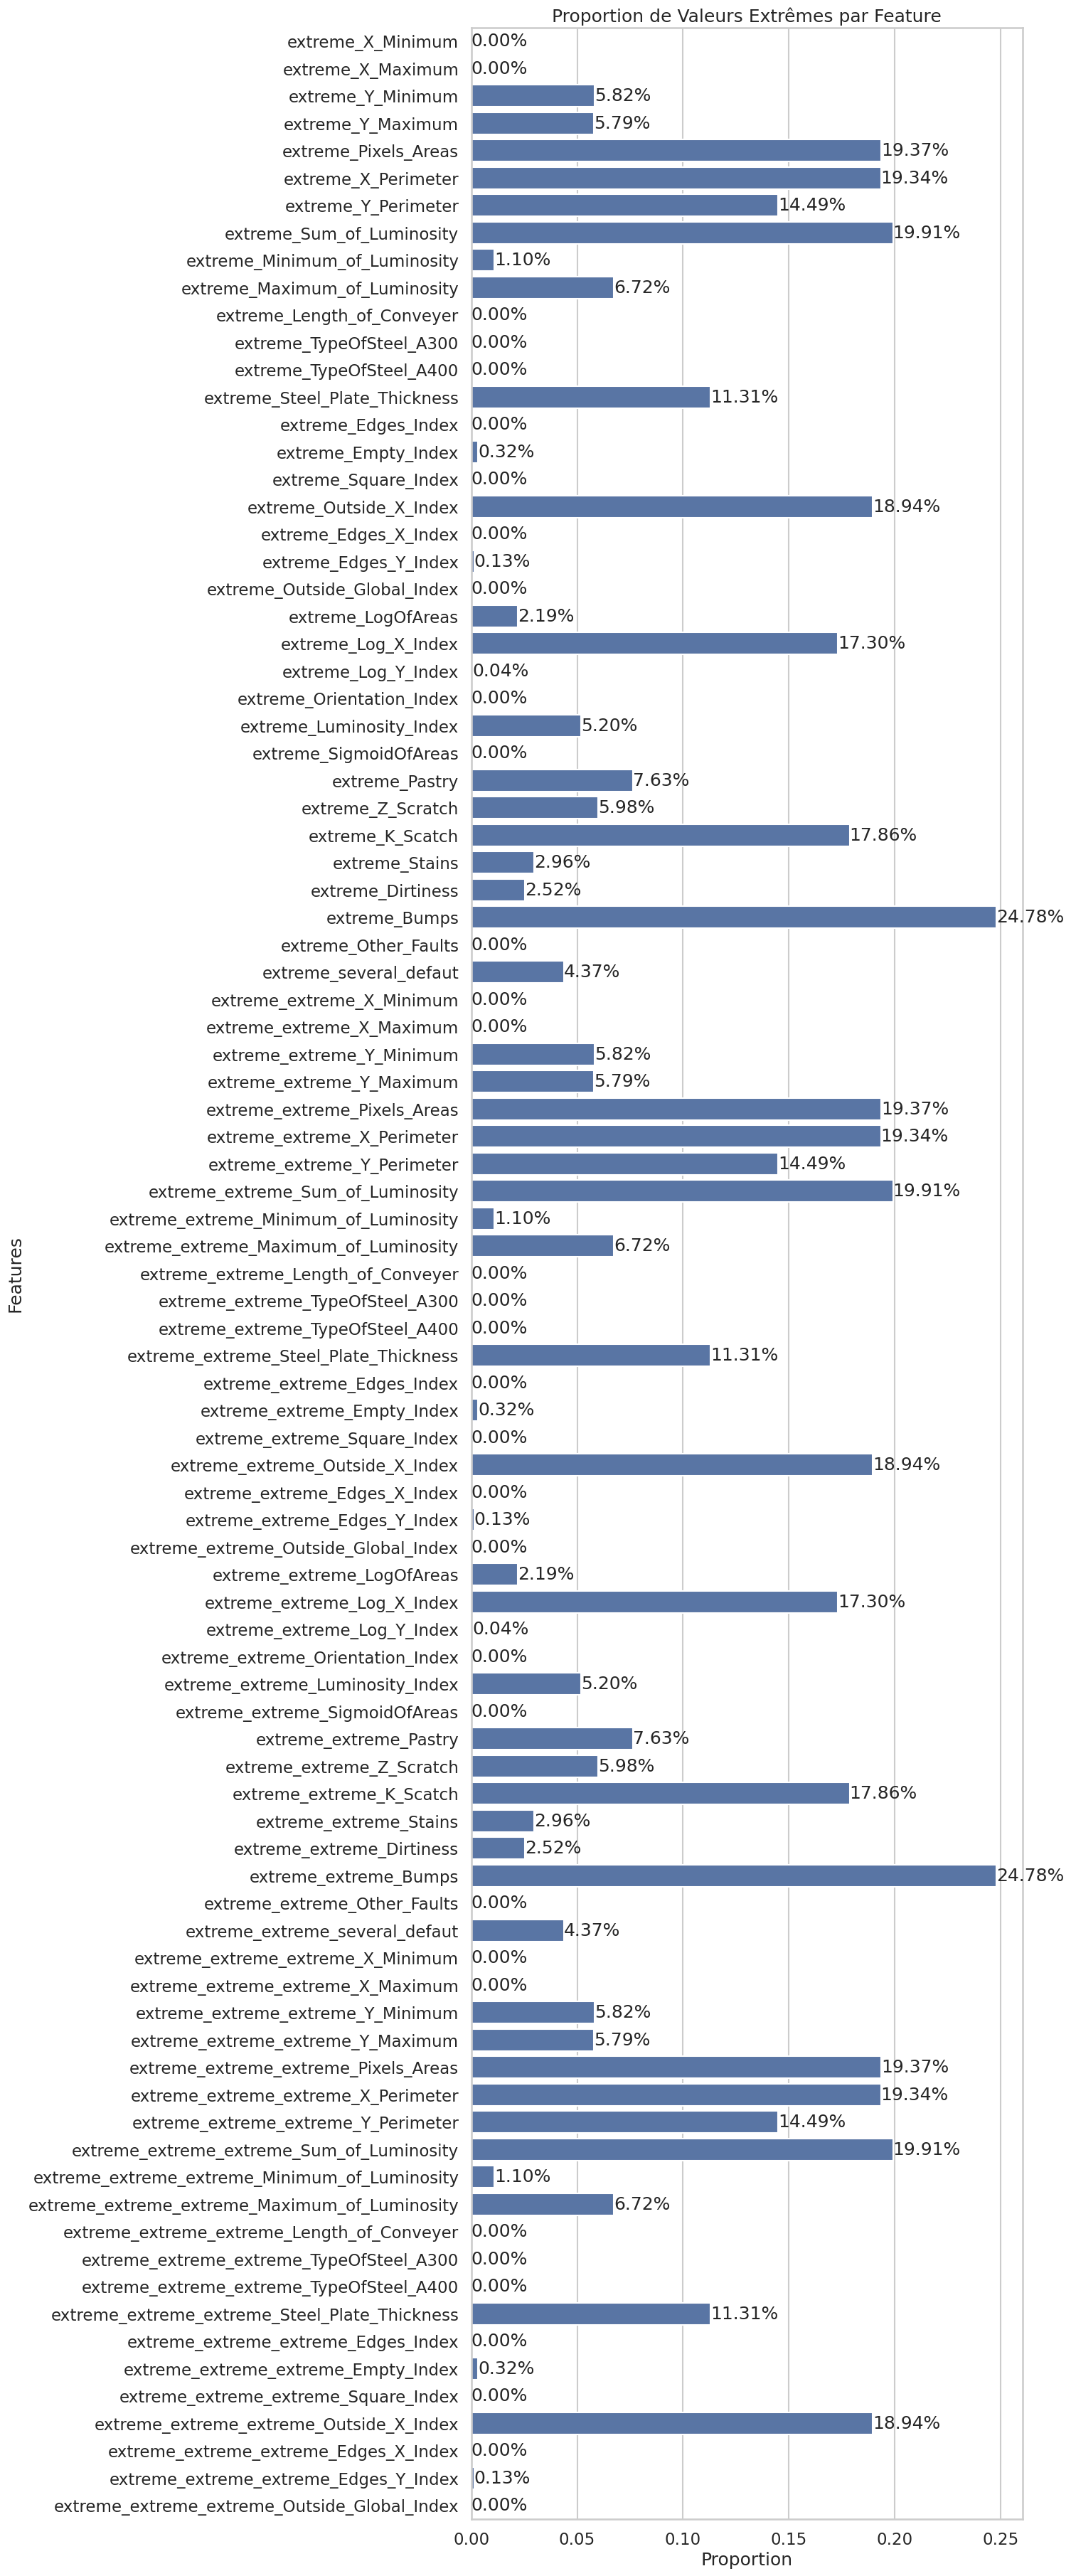

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, len(liste_name_colonne) * 0.5))

ax = sns.barplot(x=liste_proportion_extreme, y=liste_name_colonne)

ax.set_title('Proportion de Valeurs Extrêmes par Feature')
ax.set_xlabel('Proportion')
ax.set_ylabel('Features')

for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + p.get_height() / 2, '{:1.2f}%'.format(width * 100), 
             va='center')

plt.show()


In [ ]:
# Impact d'une transformation logarithmique sur les outliers

In [66]:
for _, feature in enumerate(features):
    extract_outliers_from_boxplot(transformed_log[feature],feature)
    
for _, feature in enumerate(features):
    extract_outliers_from_boxplot(df[feature],feature)

NameError: name 'transformed_log' is not defined

In [ ]:
# Fonction transformed_log à rechercher